In [38]:
import pandas as pd
from prophet import Prophet

In [39]:
df = pd.read_csv('/var/www/project/Housing/zhvi_data_long.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,country,NaN,2000-01-31,124341.456204
1,394913,1,New York,msa,NY,2000-01-31,222144.732358
2,753899,2,Los Angeles,msa,CA,2000-01-31,227474.670293
3,394463,3,Chicago,msa,IL,2000-01-31,157959.146515
4,394514,4,Dallas,msa,TX,2000-01-31,130592.692029


In [40]:
# Get all unique cities from the dataset
unique_cities = df['RegionName'].unique()

# Process each unique city
for city_name in unique_cities:
    print(f"Processing {city_name}...")
    
    # Filter data for the current city
    city_df = df[df['RegionName'] == city_name].copy()
    city_df = city_df.rename(columns={"Date": "ds", "Price": "y"})
    
    print(f"Data shape for {city_name}: {city_df.shape}")
    
    # Check if we have enough data before fitting the model
    if len(city_df.dropna()) >= 2:
        model = Prophet()
        model = model.fit(city_df)
        
        # Generate forecast
        future = model.make_future_dataframe(periods=12, freq='MS')
        forecast = model.predict(future)
        
        # Save the model
        city_slug = city_name.replace(' ', '_').lower()
        model_path = f"/var/www/project/Housing/models/prophet_{city_slug}_model.pkl"
        forecast_path = f"/var/www/project/Housing/csvs/{city_slug}_price_forecast.csv"
        
        joblib.dump(model, model_path)
        forecast[['ds', 'yhat']].to_csv(forecast_path, index=False)
        
        print(f"Model and forecast saved for {city_name}")
    else:
        print(f"Not enough data for {city_name}. Need at least 2 non-NaN rows, but only have {len(city_df.dropna())} rows.")
    
    print("-" * 50)

20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:28 - cmdstanpy - INFO - Chain [1] done processing
20:03:28 - cmdstanpy - INFO - Chain [1] start processing


['United States' 'New York' 'Los Angeles' 'Chicago' 'Dallas' 'Houston'
 'Washington' 'Philadelphia' 'Miami' 'Atlanta' 'Boston' 'Phoenix'
 'San Francisco' 'Riverside' 'Detroit' 'Seattle' 'Minneapolis' 'San Diego'
 'Tampa' 'Denver' 'Baltimore' 'St. Louis' 'Orlando' 'Charlotte'
 'San Antonio' 'Portland' 'Sacramento' 'Pittsburgh' 'Cincinnati' 'Austin'
 'Las Vegas' 'Kansas City' 'Columbus' 'Cleveland' 'San Jose' 'Nashville'
 'Virginia Beach' 'Providence' 'Jacksonville' 'Milwaukee' 'Oklahoma City'
 'Raleigh' 'Memphis' 'Richmond' 'Louisville' 'New Orleans'
 'Salt Lake City' 'Hartford' 'Buffalo' 'Birmingham' 'Rochester'
 'Grand Rapids' 'Tucson' 'Urban Honolulu' 'Tulsa' 'Fresno' 'Worcester'
 'Omaha' 'Bridgeport' 'Greenville' 'Bakersfield' 'Albany' 'Knoxville'
 'New Haven' 'El Paso' 'Allentown' 'Oxnard' 'Columbia' 'North Port'
 'Charleston' 'Greensboro' 'Stockton' 'Cape Coral' 'Colorado Springs'
 'Little Rock' 'Lakeland' 'Akron' 'Des Moines' 'Springfield' 'Ogden'
 'Madison' 'Winston' 'Deltona' '

20:03:28 - cmdstanpy - INFO - Chain [1] done processing
20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:28 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Los Angeles
--------------------------------------------------
Processing Chicago...
Data shape for Chicago: (305, 7)
Model and forecast saved for Chicago
--------------------------------------------------
Processing Dallas...
Data shape for Dallas: (304, 7)


20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:28 - cmdstanpy - INFO - Chain [1] done processing
20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Dallas
--------------------------------------------------
Processing Houston...
Data shape for Houston: (305, 7)
Model and forecast saved for Houston
--------------------------------------------------
Processing Washington...
Data shape for Washington: (768, 7)


20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Washington
--------------------------------------------------
Processing Philadelphia...
Data shape for Philadelphia: (305, 7)
Model and forecast saved for Philadelphia
--------------------------------------------------
Processing Miami...
Data shape for Miami: (610, 7)


20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Miami
--------------------------------------------------
Processing Atlanta...
Data shape for Atlanta: (305, 7)
Model and forecast saved for Atlanta
--------------------------------------------------
Processing Boston...
Data shape for Boston: (305, 7)


20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:29 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Boston
--------------------------------------------------
Processing Phoenix...
Data shape for Phoenix: (303, 7)
Model and forecast saved for Phoenix
--------------------------------------------------
Processing San Francisco...
Data shape for San Francisco: (305, 7)


20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for San Francisco
--------------------------------------------------
Processing Riverside...
Data shape for Riverside: (305, 7)
Model and forecast saved for Riverside
--------------------------------------------------
Processing Detroit...
Data shape for Detroit: (305, 7)


20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Detroit
--------------------------------------------------
Processing Seattle...
Data shape for Seattle: (305, 7)
Model and forecast saved for Seattle
--------------------------------------------------
Processing Minneapolis...
Data shape for Minneapolis: (305, 7)


20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Minneapolis
--------------------------------------------------
Processing San Diego...
Data shape for San Diego: (305, 7)
Model and forecast saved for San Diego
--------------------------------------------------
Processing Tampa...
Data shape for Tampa: (305, 7)


20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Tampa
--------------------------------------------------
Processing Denver...
Data shape for Denver: (305, 7)
Model and forecast saved for Denver
--------------------------------------------------
Processing Baltimore...
Data shape for Baltimore: (305, 7)


20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Baltimore
--------------------------------------------------
Processing St. Louis...
Data shape for St. Louis: (305, 7)
Model and forecast saved for St. Louis
--------------------------------------------------
Processing Orlando...
Data shape for Orlando: (305, 7)


20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Orlando
--------------------------------------------------
Processing Charlotte...
Data shape for Charlotte: (305, 7)
Model and forecast saved for Charlotte
--------------------------------------------------
Processing San Antonio...
Data shape for San Antonio: (305, 7)


20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for San Antonio
--------------------------------------------------
Processing Portland...
Data shape for Portland: (610, 7)
Model and forecast saved for Portland
--------------------------------------------------
Processing Sacramento...
Data shape for Sacramento: (305, 7)


20:03:31 - cmdstanpy - INFO - Chain [1] done processing
20:03:32 - cmdstanpy - INFO - Chain [1] start processing
20:03:32 - cmdstanpy - INFO - Chain [1] done processing
20:03:32 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sacramento
--------------------------------------------------
Processing Pittsburgh...
Data shape for Pittsburgh: (305, 7)
Model and forecast saved for Pittsburgh
--------------------------------------------------
Processing Cincinnati...
Data shape for Cincinnati: (305, 7)


20:03:32 - cmdstanpy - INFO - Chain [1] done processing
20:03:32 - cmdstanpy - INFO - Chain [1] start processing
20:03:32 - cmdstanpy - INFO - Chain [1] done processing
20:03:32 - cmdstanpy - INFO - Chain [1] start processing
20:03:32 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cincinnati
--------------------------------------------------
Processing Austin...
Data shape for Austin: (610, 7)
Model and forecast saved for Austin
--------------------------------------------------
Processing Las Vegas...
Data shape for Las Vegas: (466, 7)


20:03:32 - cmdstanpy - INFO - Chain [1] start processing
20:03:32 - cmdstanpy - INFO - Chain [1] done processing
20:03:32 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Las Vegas
--------------------------------------------------
Processing Kansas City...
Data shape for Kansas City: (305, 7)
Model and forecast saved for Kansas City
--------------------------------------------------
Processing Columbus...
Data shape for Columbus: (1358, 7)


20:03:32 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:33 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Columbus
--------------------------------------------------
Processing Cleveland...
Data shape for Cleveland: (722, 7)
Model and forecast saved for Cleveland
--------------------------------------------------
Processing San Jose...
Data shape for San Jose: (304, 7)


20:03:33 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:33 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for San Jose
--------------------------------------------------
Processing Nashville...
Data shape for Nashville: (305, 7)
Model and forecast saved for Nashville
--------------------------------------------------
Processing Virginia Beach...
Data shape for Virginia Beach: (305, 7)


20:03:33 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:33 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Virginia Beach
--------------------------------------------------
Processing Providence...
Data shape for Providence: (305, 7)
Model and forecast saved for Providence
--------------------------------------------------
Processing Jacksonville...
Data shape for Jacksonville: (981, 7)


20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:33 - cmdstanpy - INFO - Chain [1] done processing
20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Jacksonville
--------------------------------------------------
Processing Milwaukee...
Data shape for Milwaukee: (305, 7)
Model and forecast saved for Milwaukee
--------------------------------------------------
Processing Oklahoma City...
Data shape for Oklahoma City: (305, 7)


20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing
20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing
20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Oklahoma City
--------------------------------------------------
Processing Raleigh...
Data shape for Raleigh: (305, 7)
Model and forecast saved for Raleigh
--------------------------------------------------
Processing Memphis...
Data shape for Memphis: (305, 7)


20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing
20:03:34 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Memphis
--------------------------------------------------
Processing Richmond...
Data shape for Richmond: (804, 7)
Model and forecast saved for Richmond
--------------------------------------------------
Processing Louisville...
Data shape for Louisville: (305, 7)


20:03:34 - cmdstanpy - INFO - Chain [1] done processing
20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing
20:03:34 - cmdstanpy - INFO - Chain [1] start processing
20:03:35 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Louisville
--------------------------------------------------
Processing New Orleans...
Data shape for New Orleans: (305, 7)
Model and forecast saved for New Orleans
--------------------------------------------------
Processing Salt Lake City...
Data shape for Salt Lake City: (305, 7)


20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Salt Lake City
--------------------------------------------------
Processing Hartford...
Data shape for Hartford: (305, 7)
Model and forecast saved for Hartford
--------------------------------------------------
Processing Buffalo...
Data shape for Buffalo: (305, 7)


20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Buffalo
--------------------------------------------------
Processing Birmingham...
Data shape for Birmingham: (305, 7)
Model and forecast saved for Birmingham
--------------------------------------------------
Processing Rochester...
Data shape for Rochester: (610, 7)


20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Rochester
--------------------------------------------------
Processing Grand Rapids...
Data shape for Grand Rapids: (305, 7)
Model and forecast saved for Grand Rapids
--------------------------------------------------
Processing Tucson...
Data shape for Tucson: (304, 7)


20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:36 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Tucson
--------------------------------------------------
Processing Urban Honolulu...
Data shape for Urban Honolulu: (305, 7)
Model and forecast saved for Urban Honolulu
--------------------------------------------------
Processing Tulsa...
Data shape for Tulsa: (305, 7)


20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:36 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Tulsa
--------------------------------------------------
Processing Fresno...
Data shape for Fresno: (305, 7)
Model and forecast saved for Fresno
--------------------------------------------------
Processing Worcester...
Data shape for Worcester: (305, 7)


20:03:36 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:36 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:36 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Worcester
--------------------------------------------------
Processing Omaha...
Data shape for Omaha: (305, 7)
Model and forecast saved for Omaha
--------------------------------------------------
Processing Bridgeport...
Data shape for Bridgeport: (305, 7)


20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bridgeport
--------------------------------------------------
Processing Greenville...
Data shape for Greenville: (887, 7)
Model and forecast saved for Greenville
--------------------------------------------------
Processing Bakersfield...
Data shape for Bakersfield: (305, 7)


20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bakersfield
--------------------------------------------------
Processing Albany...
Data shape for Albany: (818, 7)
Model and forecast saved for Albany
--------------------------------------------------
Processing Knoxville...
Data shape for Knoxville: (305, 7)


20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Knoxville
--------------------------------------------------
Processing New Haven...
Data shape for New Haven: (305, 7)
Model and forecast saved for New Haven
--------------------------------------------------
Processing El Paso...
Data shape for El Paso: (305, 7)


20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:37 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for El Paso
--------------------------------------------------
Processing Allentown...
Data shape for Allentown: (305, 7)
Model and forecast saved for Allentown
--------------------------------------------------
Processing Oxnard...
Data shape for Oxnard: (305, 7)


20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Oxnard
--------------------------------------------------
Processing Columbia...
Data shape for Columbia: (542, 7)
Model and forecast saved for Columbia
--------------------------------------------------
Processing North Port...
Data shape for North Port: (305, 7)


20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for North Port
--------------------------------------------------
Processing Charleston...
Data shape for Charleston: (805, 7)
Model and forecast saved for Charleston
--------------------------------------------------
Processing Greensboro...
Data shape for Greensboro: (305, 7)


20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Greensboro
--------------------------------------------------
Processing Stockton...
Data shape for Stockton: (305, 7)
Model and forecast saved for Stockton
--------------------------------------------------
Processing Cape Coral...
Data shape for Cape Coral: (305, 7)


20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cape Coral
--------------------------------------------------
Processing Colorado Springs...
Data shape for Colorado Springs: (305, 7)
Model and forecast saved for Colorado Springs
--------------------------------------------------
Processing Little Rock...
Data shape for Little Rock: (304, 7)


20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:39 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Little Rock
--------------------------------------------------
Processing Lakeland...
Data shape for Lakeland: (304, 7)
Model and forecast saved for Lakeland
--------------------------------------------------
Processing Akron...
Data shape for Akron: (305, 7)


20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:39 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Akron
--------------------------------------------------
Processing Des Moines...
Data shape for Des Moines: (305, 7)
Model and forecast saved for Des Moines
--------------------------------------------------
Processing Springfield...
Data shape for Springfield: (1051, 7)


20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Springfield
--------------------------------------------------
Processing Ogden...
Data shape for Ogden: (305, 7)
Model and forecast saved for Ogden
--------------------------------------------------
Processing Madison...
Data shape for Madison: (466, 7)


20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Madison
--------------------------------------------------
Processing Winston...
Data shape for Winston: (305, 7)
Model and forecast saved for Winston
--------------------------------------------------
Processing Deltona...
Data shape for Deltona: (305, 7)


20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Deltona
--------------------------------------------------
Processing Syracuse...
Data shape for Syracuse: (305, 7)
Model and forecast saved for Syracuse
--------------------------------------------------
Processing Toledo...
Data shape for Toledo: (305, 7)


20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Toledo
--------------------------------------------------
Processing Durham...
Data shape for Durham: (304, 7)
Model and forecast saved for Durham
--------------------------------------------------
Processing Augusta...
Data shape for Augusta: (610, 7)


20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing
20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Augusta
--------------------------------------------------
Processing Palm Bay...
Data shape for Palm Bay: (305, 7)
Model and forecast saved for Palm Bay
--------------------------------------------------
Processing Harrisburg...
Data shape for Harrisburg: (305, 7)


20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing
20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Harrisburg
--------------------------------------------------
Processing Spokane...
Data shape for Spokane: (305, 7)
Model and forecast saved for Spokane
--------------------------------------------------
Processing Scranton...
Data shape for Scranton: (305, 7)


20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing
20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Scranton
--------------------------------------------------
Processing Chattanooga...
Data shape for Chattanooga: (305, 7)
Model and forecast saved for Chattanooga
--------------------------------------------------
Processing Modesto...
Data shape for Modesto: (305, 7)


20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Modesto
--------------------------------------------------
Processing Youngstown...
Data shape for Youngstown: (305, 7)
Model and forecast saved for Youngstown
--------------------------------------------------
Processing Lansing...
Data shape for Lansing: (305, 7)


20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lansing
--------------------------------------------------
Processing Fayetteville...
Data shape for Fayetteville: (606, 7)
Model and forecast saved for Fayetteville
--------------------------------------------------
Processing Lexington...
Data shape for Lexington: (512, 7)


20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lexington
--------------------------------------------------
Processing Pensacola...
Data shape for Pensacola: (305, 7)
Model and forecast saved for Pensacola
--------------------------------------------------
Processing Santa Rosa...
Data shape for Santa Rosa: (305, 7)


20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Santa Rosa
--------------------------------------------------
Processing Reno...
Data shape for Reno: (305, 7)
Model and forecast saved for Reno
--------------------------------------------------
Processing Port St. Lucie...
Data shape for Port St. Lucie: (305, 7)


20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Port St. Lucie
--------------------------------------------------
Processing Visalia...
Data shape for Visalia: (305, 7)
Model and forecast saved for Visalia
--------------------------------------------------
Processing Asheville...
Data shape for Asheville: (305, 7)


20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Asheville
--------------------------------------------------
Processing York...
Data shape for York: (304, 7)
Model and forecast saved for York
--------------------------------------------------
Processing Vallejo...
Data shape for Vallejo: (305, 7)


20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Vallejo
--------------------------------------------------
Processing Santa Maria...
Data shape for Santa Maria: (305, 7)
Model and forecast saved for Santa Maria
--------------------------------------------------
Processing Salinas...
Data shape for Salinas: (305, 7)


20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Salinas
--------------------------------------------------
Processing Salem...
Data shape for Salem: (608, 7)
Model and forecast saved for Salem
--------------------------------------------------
Processing Mobile...
Data shape for Mobile: (305, 7)


20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mobile
--------------------------------------------------
Processing Reading...
Data shape for Reading: (305, 7)


20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Reading
--------------------------------------------------
Processing Manchester...
Data shape for Manchester: (305, 7)
Model and forecast saved for Manchester
--------------------------------------------------
Processing Salisbury...
Data shape for Salisbury: (305, 7)


20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Salisbury
--------------------------------------------------
Processing Flint...
Data shape for Flint: (304, 7)
Model and forecast saved for Flint
--------------------------------------------------
Processing Canton...
Data shape for Canton: (305, 7)


20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Canton
--------------------------------------------------
Processing Savannah...
Data shape for Savannah: (305, 7)
Model and forecast saved for Savannah
--------------------------------------------------
Processing Anchorage...
Data shape for Anchorage: (303, 7)


20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:45 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Anchorage
--------------------------------------------------
Processing Trenton...
Data shape for Trenton: (305, 7)
Model and forecast saved for Trenton
--------------------------------------------------
Processing Montgomery...
Data shape for Montgomery: (305, 7)


20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Montgomery
--------------------------------------------------
Processing Tallahassee...
Data shape for Tallahassee: (305, 7)
Model and forecast saved for Tallahassee
--------------------------------------------------
Processing Eugene...
Data shape for Eugene: (305, 7)


20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Eugene
--------------------------------------------------
Processing Naples...
Data shape for Naples: (304, 7)
Model and forecast saved for Naples
--------------------------------------------------
Processing Ann Arbor...
Data shape for Ann Arbor: (305, 7)


20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Ann Arbor
--------------------------------------------------
Processing Hickory...
Data shape for Hickory: (305, 7)
Model and forecast saved for Hickory
--------------------------------------------------
Processing Huntington...
Data shape for Huntington: (497, 7)


20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:46 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Huntington
--------------------------------------------------
Processing Fort Collins...
Data shape for Fort Collins: (305, 7)
Model and forecast saved for Fort Collins
--------------------------------------------------
Processing Rockford...
Data shape for Rockford: (305, 7)


20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Rockford
--------------------------------------------------
Processing Lincoln...
Data shape for Lincoln: (442, 7)
Model and forecast saved for Lincoln
--------------------------------------------------
Processing Gainesville...
Data shape for Gainesville: (805, 7)


20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Gainesville
--------------------------------------------------
Processing Boulder...
Data shape for Boulder: (305, 7)
Model and forecast saved for Boulder
--------------------------------------------------
Processing Greeley...
Data shape for Greeley: (305, 7)


20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Greeley
--------------------------------------------------
Processing Lubbock...
Data shape for Lubbock: (303, 7)
Model and forecast saved for Lubbock
--------------------------------------------------
Processing Clarksville...
Data shape for Clarksville: (305, 7)


20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Clarksville
--------------------------------------------------
Processing Evansville...
Data shape for Evansville: (305, 7)
Model and forecast saved for Evansville
--------------------------------------------------
Processing Kingsport...
Data shape for Kingsport: (305, 7)


20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Kingsport
--------------------------------------------------
Processing Kennewick...
Data shape for Kennewick: (301, 7)
Model and forecast saved for Kennewick
--------------------------------------------------
Processing Utica...
Data shape for Utica: (305, 7)


20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:48 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Utica
--------------------------------------------------
Processing Hagerstown...
Data shape for Hagerstown: (305, 7)
Model and forecast saved for Hagerstown
--------------------------------------------------
Processing Olympia...
Data shape for Olympia: (304, 7)


20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Olympia
--------------------------------------------------
Processing Longview...
Data shape for Longview: (501, 7)
Model and forecast saved for Longview
--------------------------------------------------
Processing San Luis Obispo...
Data shape for San Luis Obispo: (305, 7)


20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for San Luis Obispo
--------------------------------------------------
Processing Crestview...
Data shape for Crestview: (305, 7)
Model and forecast saved for Crestview
--------------------------------------------------
Processing Cedar Rapids...
Data shape for Cedar Rapids: (305, 7)


20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Cedar Rapids
--------------------------------------------------
Processing Atlantic City...
Data shape for Atlantic City: (305, 7)
Model and forecast saved for Atlantic City
--------------------------------------------------
Processing Bremerton...
Data shape for Bremerton: (305, 7)


20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bremerton
--------------------------------------------------
Processing Santa Cruz...
Data shape for Santa Cruz: (305, 7)
Model and forecast saved for Santa Cruz
--------------------------------------------------
Processing Erie...
Data shape for Erie: (305, 7)


20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Erie
--------------------------------------------------
Processing Norwich...
Data shape for Norwich: (305, 7)
Model and forecast saved for Norwich
--------------------------------------------------
Processing Tuscaloosa...
Data shape for Tuscaloosa: (305, 7)


20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Tuscaloosa
--------------------------------------------------
Processing Kalamazoo...
Data shape for Kalamazoo: (305, 7)
Model and forecast saved for Kalamazoo
--------------------------------------------------
Processing Lynchburg...
Data shape for Lynchburg: (305, 7)


20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Lynchburg
--------------------------------------------------
Processing Binghamton...
Data shape for Binghamton: (305, 7)
Model and forecast saved for Binghamton
--------------------------------------------------
Processing Fort Smith...
Data shape for Fort Smith: (305, 7)


20:03:50 - cmdstanpy - INFO - Chain [1] start processing
20:03:50 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Fort Smith
--------------------------------------------------
Processing Topeka...
Data shape for Topeka: (305, 7)
Model and forecast saved for Topeka
--------------------------------------------------
Processing Macon...
Data shape for Macon: (305, 7)


20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Macon
--------------------------------------------------
Processing Barnstable Town...
Data shape for Barnstable Town: (305, 7)
Model and forecast saved for Barnstable Town
--------------------------------------------------
Processing Daphne...
Data shape for Daphne: (305, 7)


20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Daphne
--------------------------------------------------
Processing Burlington...
Data shape for Burlington: (613, 7)
Model and forecast saved for Burlington
--------------------------------------------------
Processing Lafayette...
Data shape for Lafayette: (566, 7)


20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lafayette
--------------------------------------------------
Processing Medford...
Data shape for Medford: (305, 7)
Model and forecast saved for Medford
--------------------------------------------------
Processing Charlottesville...
Data shape for Charlottesville: (303, 7)


20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing
20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Charlottesville
--------------------------------------------------
Processing Hilton Head Island...
Data shape for Hilton Head Island: (305, 7)
Model and forecast saved for Hilton Head Island
--------------------------------------------------
Processing Athens...
Data shape for Athens: (863, 7)


20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing
20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Athens
--------------------------------------------------
Processing Lake Havasu City...
Data shape for Lake Havasu City: (305, 7)
Model and forecast saved for Lake Havasu City
--------------------------------------------------
Processing Monroe...
Data shape for Monroe: (608, 7)


20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing
20:03:52 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Monroe
--------------------------------------------------
Processing Johnson City...
Data shape for Johnson City: (305, 7)


20:03:53 - cmdstanpy - INFO - Chain [1] start processing
20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Johnson City
--------------------------------------------------
Processing Bend...
Data shape for Bend: (302, 7)
Model and forecast saved for Bend
--------------------------------------------------
Processing Saginaw...
Data shape for Saginaw: (305, 7)


20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing
20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Saginaw
--------------------------------------------------
Processing Warner Robins...
Data shape for Warner Robins: (305, 7)
Model and forecast saved for Warner Robins
--------------------------------------------------
Processing Torrington...
Data shape for Torrington: (305, 7)


20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing
20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Torrington
--------------------------------------------------
Processing Punta Gorda...
Data shape for Punta Gorda: (305, 7)
Model and forecast saved for Punta Gorda
--------------------------------------------------
Processing Redding...
Data shape for Redding: (305, 7)


20:03:53 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Redding
--------------------------------------------------
Processing Kingston...
Data shape for Kingston: (305, 7)
Model and forecast saved for Kingston
--------------------------------------------------
Processing Panama City...
Data shape for Panama City: (305, 7)


20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Panama City
--------------------------------------------------
Processing Jackson...
Data shape for Jackson: (1337, 7)


20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Jackson
--------------------------------------------------
Processing Bowling Green...
Data shape for Bowling Green: (305, 7)
Model and forecast saved for Bowling Green
--------------------------------------------------
Processing Muskegon...
Data shape for Muskegon: (305, 7)


20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Muskegon
--------------------------------------------------
Processing Auburn...
Data shape for Auburn: (804, 7)
Model and forecast saved for Auburn
--------------------------------------------------
Processing Bloomington...
Data shape for Bloomington: (567, 7)


20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bloomington
--------------------------------------------------
Processing Pueblo...
Data shape for Pueblo: (305, 7)
Model and forecast saved for Pueblo
--------------------------------------------------
Processing Blacksburg...
Data shape for Blacksburg: (305, 7)


20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Blacksburg
--------------------------------------------------
Processing Kahului...
Data shape for Kahului: (305, 7)
Model and forecast saved for Kahului
--------------------------------------------------
Processing Sebastian...
Data shape for Sebastian: (305, 7)


20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sebastian
--------------------------------------------------
Processing Vineland...
Data shape for Vineland: (305, 7)
Model and forecast saved for Vineland
--------------------------------------------------
Processing Idaho Falls...
Data shape for Idaho Falls: (305, 7)


20:03:55 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Idaho Falls
--------------------------------------------------
Processing Grand Junction...
Data shape for Grand Junction: (305, 7)
Model and forecast saved for Grand Junction
--------------------------------------------------
Processing Elizabethtown...
Data shape for Elizabethtown: (303, 7)


20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Elizabethtown
--------------------------------------------------
Processing Niles...
Data shape for Niles: (305, 7)
Model and forecast saved for Niles
--------------------------------------------------
Processing Concord...
Data shape for Concord: (305, 7)


20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Concord
--------------------------------------------------
Processing Alexandria...
Data shape for Alexandria: (558, 7)
Model and forecast saved for Alexandria
--------------------------------------------------
Processing Traverse City...
Data shape for Traverse City: (305, 7)


20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Traverse City
--------------------------------------------------
Processing Bangor...
Data shape for Bangor: (305, 7)
Model and forecast saved for Bangor
--------------------------------------------------
Processing Homosassa Springs...
Data shape for Homosassa Springs: (305, 7)


20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Homosassa Springs
--------------------------------------------------
Processing London...
Data shape for London: (305, 7)
Model and forecast saved for London
--------------------------------------------------
Processing Sioux City...
Data shape for Sioux City: (304, 7)


20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sioux City
--------------------------------------------------
Processing Texarkana...
Data shape for Texarkana: (304, 7)
Model and forecast saved for Texarkana
--------------------------------------------------
Processing Valdosta...
Data shape for Valdosta: (302, 7)


20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Valdosta
--------------------------------------------------
Processing Flagstaff...
Data shape for Flagstaff: (305, 7)
Model and forecast saved for Flagstaff
--------------------------------------------------
Processing Rocky Mount...
Data shape for Rocky Mount: (305, 7)


20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:57 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Rocky Mount
--------------------------------------------------
Processing Dalton...
Data shape for Dalton: (304, 7)
Model and forecast saved for Dalton
--------------------------------------------------
Processing Morristown...
Data shape for Morristown: (302, 7)


20:03:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Morristown
--------------------------------------------------
Processing Winchester...
Data shape for Winchester: (305, 7)
Model and forecast saved for Winchester
--------------------------------------------------
Processing Wheeling...
Data shape for Wheeling: (305, 7)


20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Wheeling
--------------------------------------------------
Processing Morgantown...
Data shape for Morgantown: (302, 7)
Model and forecast saved for Morgantown
--------------------------------------------------
Processing Napa...
Data shape for Napa: (305, 7)


20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Napa
--------------------------------------------------
Processing Battle Creek...
Data shape for Battle Creek: (305, 7)
Model and forecast saved for Battle Creek
--------------------------------------------------
Processing Jonesboro...
Data shape for Jonesboro: (305, 7)


20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Jonesboro
--------------------------------------------------
Processing Pittsfield...
Data shape for Pittsfield: (305, 7)
Model and forecast saved for Pittsfield
--------------------------------------------------
Processing Mount Vernon...
Data shape for Mount Vernon: (697, 7)


20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mount Vernon
--------------------------------------------------
Processing Jamestown...
Data shape for Jamestown: (418, 7)
Model and forecast saved for Jamestown
--------------------------------------------------
Processing The Villages...
Data shape for The Villages: (302, 7)


20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for The Villages
--------------------------------------------------
Processing Glens Falls...
Data shape for Glens Falls: (304, 7)
Model and forecast saved for Glens Falls
--------------------------------------------------
Processing Lawton...
Data shape for Lawton: (300, 7)


20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lawton
--------------------------------------------------
Processing Mansfield...
Data shape for Mansfield: (301, 7)
Model and forecast saved for Mansfield
--------------------------------------------------
Processing Altoona...
Data shape for Altoona: (305, 7)


20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Altoona
--------------------------------------------------
Processing New Bern...
Data shape for New Bern: (305, 7)
Model and forecast saved for New Bern
--------------------------------------------------
Processing Owensboro...
Data shape for Owensboro: (303, 7)


20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Owensboro
--------------------------------------------------
Processing Holland...
Data shape for Holland: (304, 7)
Model and forecast saved for Holland
--------------------------------------------------
Processing Goldsboro...
Data shape for Goldsboro: (305, 7)


20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Goldsboro
--------------------------------------------------
Processing Watertown...
Data shape for Watertown: (658, 7)
Model and forecast saved for Watertown
--------------------------------------------------
Processing Beckley...
Data shape for Beckley: (302, 7)


20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Beckley
--------------------------------------------------
Processing Williamsport...
Data shape for Williamsport: (302, 7)
Model and forecast saved for Williamsport
--------------------------------------------------
Processing Brunswick...
Data shape for Brunswick: (305, 7)


20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Brunswick
--------------------------------------------------
Processing California...
Data shape for California: (305, 7)
Model and forecast saved for California
--------------------------------------------------
Processing Cookeville...
Data shape for Cookeville: (305, 7)


20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cookeville
--------------------------------------------------
Processing Roseburg...
Data shape for Roseburg: (305, 7)
Model and forecast saved for Roseburg
--------------------------------------------------
Processing Lewiston...
Data shape for Lewiston: (500, 7)


20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Lewiston
--------------------------------------------------
Processing Ogdensburg...
Data shape for Ogdensburg: (305, 7)
Model and forecast saved for Ogdensburg
--------------------------------------------------
Processing Bluefield...
Data shape for Bluefield: (305, 7)


20:04:01 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Bluefield
--------------------------------------------------
Processing Show Low...
Data shape for Show Low: (305, 7)
Model and forecast saved for Show Low
--------------------------------------------------
Processing Tullahoma...
Data shape for Tullahoma: (305, 7)


20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Tullahoma
--------------------------------------------------
Processing Ithaca...
Data shape for Ithaca: (305, 7)
Model and forecast saved for Ithaca
--------------------------------------------------
Processing Decatur...
Data shape for Decatur: (722, 7)


20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Decatur
--------------------------------------------------
Processing LaGrange...
Data shape for LaGrange: (301, 7)
Model and forecast saved for LaGrange
--------------------------------------------------
Processing Bay City...
Data shape for Bay City: (499, 7)


20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Bay City
--------------------------------------------------
Processing Gettysburg...
Data shape for Gettysburg: (303, 7)
Model and forecast saved for Gettysburg
--------------------------------------------------
Processing Danville...


20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Danville: (915, 7)
Model and forecast saved for Danville
--------------------------------------------------
Processing Lima...
Data shape for Lima: (303, 7)


20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lima
--------------------------------------------------
Processing Hot Springs...
Data shape for Hot Springs: (305, 7)
Model and forecast saved for Hot Springs
--------------------------------------------------
Processing Adrian...
Data shape for Adrian: (305, 7)


20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Adrian
--------------------------------------------------
Processing Shelby...
Data shape for Shelby: (301, 7)
Model and forecast saved for Shelby
--------------------------------------------------
Processing Paducah...
Data shape for Paducah: (301, 7)


20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Paducah
--------------------------------------------------
Processing Rome...
Data shape for Rome: (303, 7)
Model and forecast saved for Rome
--------------------------------------------------
Processing Sevierville...
Data shape for Sevierville: (305, 7)


20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sevierville
--------------------------------------------------
Processing Ashtabula...
Data shape for Ashtabula: (305, 7)
Model and forecast saved for Ashtabula
--------------------------------------------------
Processing Cumberland...
Data shape for Cumberland: (296, 7)


20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Cumberland
--------------------------------------------------
Processing Ocean City...
Data shape for Ocean City: (305, 7)
Model and forecast saved for Ocean City
--------------------------------------------------
Processing Corvallis...
Data shape for Corvallis: (304, 7)


20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Corvallis
--------------------------------------------------
Processing Corning...
Data shape for Corning: (305, 7)
Model and forecast saved for Corning
--------------------------------------------------
Processing New Philadelphia...
Data shape for New Philadelphia: (301, 7)


20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for New Philadelphia
--------------------------------------------------
Processing Clarksburg...
Data shape for Clarksburg: (305, 7)
Model and forecast saved for Clarksburg
--------------------------------------------------
Processing Parkersburg...
Data shape for Parkersburg: (303, 7)


20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Parkersburg
--------------------------------------------------
Processing Pine Bluff...
Data shape for Pine Bluff: (305, 7)
Model and forecast saved for Pine Bluff
--------------------------------------------------
Processing Grants Pass...
Data shape for Grants Pass: (304, 7)


20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Grants Pass
--------------------------------------------------
Processing Lufkin...
Data shape for Lufkin: (305, 7)
Model and forecast saved for Lufkin
--------------------------------------------------
Processing Zanesville...
Data shape for Zanesville: (305, 7)


20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:05 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Zanesville
--------------------------------------------------
Processing Meadville...
Data shape for Meadville: (305, 7)
Model and forecast saved for Meadville
--------------------------------------------------
Processing Elmira...
Data shape for Elmira: (302, 7)


20:04:06 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Elmira
--------------------------------------------------
Processing Russellville...
Data shape for Russellville: (305, 7)
Model and forecast saved for Russellville
--------------------------------------------------
Processing Midland...
Data shape for Midland: (502, 7)


20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Midland
--------------------------------------------------
Processing Bloomsburg...
Data shape for Bloomsburg: (305, 7)
Model and forecast saved for Bloomsburg
--------------------------------------------------
Processing Stillwater...
Data shape for Stillwater: (305, 7)


20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Stillwater
--------------------------------------------------
Processing Manitowoc...
Data shape for Manitowoc: (301, 7)
Model and forecast saved for Manitowoc
--------------------------------------------------
Processing Hinesville...
Data shape for Hinesville: (301, 7)


20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:06 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Hinesville
--------------------------------------------------
Processing DuBois...
Data shape for DuBois: (305, 7)
Model and forecast saved for DuBois
--------------------------------------------------
Processing Warsaw...
Data shape for Warsaw: (300, 7)


20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:07 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Warsaw
--------------------------------------------------
Processing Plattsburgh...
Data shape for Plattsburgh: (302, 7)
Model and forecast saved for Plattsburgh
--------------------------------------------------
Processing Glenwood Springs...
Data shape for Glenwood Springs: (305, 7)


20:04:07 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:07 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Glenwood Springs
--------------------------------------------------
Processing Olean...
Data shape for Olean: (302, 7)
Model and forecast saved for Olean
--------------------------------------------------
Processing Chillicothe...
Data shape for Chillicothe: (305, 7)


20:04:07 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Chillicothe
--------------------------------------------------
Processing Searcy...
Data shape for Searcy: (301, 7)
Model and forecast saved for Searcy
--------------------------------------------------
Processing Keene...


20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Keene: (305, 7)
Model and forecast saved for Keene
--------------------------------------------------
Processing Sandusky...
Data shape for Sandusky: (304, 7)


20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sandusky
--------------------------------------------------
Processing Findlay...
Data shape for Findlay: (305, 7)
Model and forecast saved for Findlay
--------------------------------------------------
Processing Frankfort...
Data shape for Frankfort: (608, 7)


20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Frankfort
--------------------------------------------------
Processing Kapaa...
Data shape for Kapaa: (305, 7)
Model and forecast saved for Kapaa
--------------------------------------------------
Processing Shawnee...
Data shape for Shawnee: (305, 7)


20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:08 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Shawnee
--------------------------------------------------
Processing Greeneville...
Data shape for Greeneville: (305, 7)
Model and forecast saved for Greeneville
--------------------------------------------------
Processing Greenwood...
Data shape for Greenwood: (463, 7)


20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Greenwood
--------------------------------------------------
Processing Lake City...
Data shape for Lake City: (302, 7)
Model and forecast saved for Lake City
--------------------------------------------------
Processing Klamath Falls...
Data shape for Klamath Falls: (305, 7)


20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Klamath Falls
--------------------------------------------------
Processing Morehead City...
Data shape for Morehead City: (305, 7)
Model and forecast saved for Morehead City
--------------------------------------------------
Processing Roanoke Rapids...
Data shape for Roanoke Rapids: (305, 7)


20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Roanoke Rapids
--------------------------------------------------
Processing Muskogee...
Data shape for Muskogee: (301, 7)
Model and forecast saved for Muskogee
--------------------------------------------------
Processing Marquette...
Data shape for Marquette: (303, 7)


20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Marquette
--------------------------------------------------
Processing North Wilkesboro...
Data shape for North Wilkesboro: (305, 7)
Model and forecast saved for North Wilkesboro
--------------------------------------------------
Processing Marinette...
Data shape for Marinette: (305, 7)


20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Marinette
--------------------------------------------------
Processing Dublin...
Data shape for Dublin: (305, 7)
Model and forecast saved for Dublin
--------------------------------------------------
Processing Somerset...
Data shape for Somerset: (502, 7)


20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Somerset
--------------------------------------------------
Processing Forest City...
Data shape for Forest City: (301, 7)
Model and forecast saved for Forest City
--------------------------------------------------
Processing Martinsville...
Data shape for Martinsville: (302, 7)


20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Martinsville
--------------------------------------------------
Processing Laconia...
Data shape for Laconia: (305, 7)
Model and forecast saved for Laconia
--------------------------------------------------
Processing Sanford...
Data shape for Sanford: (301, 7)


20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing
20:04:11 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sanford
--------------------------------------------------
Processing Enid...
Data shape for Enid: (298, 7)
Model and forecast saved for Enid
--------------------------------------------------
Processing Walla Walla...
Data shape for Walla Walla: (303, 7)


20:04:11 - cmdstanpy - INFO - Chain [1] done processing
20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing
20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Walla Walla
--------------------------------------------------
Processing Hudson...
Data shape for Hudson: (305, 7)
Model and forecast saved for Hudson
--------------------------------------------------
Processing Sturgis...
Data shape for Sturgis: (301, 7)


20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing
20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:11 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sturgis
--------------------------------------------------
Processing Rutland...
Data shape for Rutland: (302, 7)
Model and forecast saved for Rutland
--------------------------------------------------
Processing Crossville...
Data shape for Crossville: (302, 7)


20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Crossville
--------------------------------------------------
Processing Marietta...
Data shape for Marietta: (305, 7)
Model and forecast saved for Marietta
--------------------------------------------------
Processing Barre...
Data shape for Barre: (304, 7)


20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Barre
--------------------------------------------------
Processing Fremont...
Data shape for Fremont: (502, 7)
Model and forecast saved for Fremont
--------------------------------------------------
Processing Oneonta...
Data shape for Oneonta: (305, 7)


20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Oneonta
--------------------------------------------------
Processing Norwalk...
Data shape for Norwalk: (302, 7)
Model and forecast saved for Norwalk
--------------------------------------------------
Processing Batavia...
Data shape for Batavia: (305, 7)


20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:12 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Batavia
--------------------------------------------------
Processing Ardmore...
Data shape for Ardmore: (305, 7)
Model and forecast saved for Ardmore
--------------------------------------------------
Processing Carson City...
Data shape for Carson City: (305, 7)


20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Carson City
--------------------------------------------------
Processing Ontario...
Data shape for Ontario: (305, 7)
Model and forecast saved for Ontario
--------------------------------------------------
Processing Waycross...
Data shape for Waycross: (305, 7)


20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Waycross
--------------------------------------------------
Processing Edwards...
Data shape for Edwards: (302, 7)
Model and forecast saved for Edwards
--------------------------------------------------
Processing Tiffin...
Data shape for Tiffin: (305, 7)


20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Tiffin
--------------------------------------------------
Processing Batesville...
Data shape for Batesville: (305, 7)
Model and forecast saved for Batesville
--------------------------------------------------
Processing Point Pleasant...
Data shape for Point Pleasant: (302, 7)


20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Point Pleasant
--------------------------------------------------
Processing Glasgow...
Data shape for Glasgow: (301, 7)
Model and forecast saved for Glasgow
--------------------------------------------------
Processing St. Marys...
Data shape for St. Marys: (303, 7)


20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for St. Marys
--------------------------------------------------
Processing Boone...
Data shape for Boone: (303, 7)
Model and forecast saved for Boone
--------------------------------------------------
Processing Gloversville...
Data shape for Gloversville: (305, 7)


20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Gloversville
--------------------------------------------------
Processing Payson...
Data shape for Payson: (305, 7)
Model and forecast saved for Payson
--------------------------------------------------
Processing Bartlesville...
Data shape for Bartlesville: (305, 7)


20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bartlesville
--------------------------------------------------
Processing Douglas...
Data shape for Douglas: (303, 7)
Model and forecast saved for Douglas
--------------------------------------------------
Processing Oil City...
Data shape for Oil City: (305, 7)


20:04:14 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:15 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Oil City
--------------------------------------------------
Processing Newport...
Data shape for Newport: (607, 7)
Model and forecast saved for Newport
--------------------------------------------------
Processing Shelbyville...
Data shape for Shelbyville: (305, 7)


20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Shelbyville
--------------------------------------------------
Processing Amsterdam...
Data shape for Amsterdam: (304, 7)
Model and forecast saved for Amsterdam
--------------------------------------------------
Processing Gardnerville Ranchos...
Data shape for Gardnerville Ranchos: (304, 7)


20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Gardnerville Ranchos
--------------------------------------------------
Processing Ruston...
Data shape for Ruston: (301, 7)
Model and forecast saved for Ruston
--------------------------------------------------
Processing Sidney...
Data shape for Sidney: (301, 7)


20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:15 - cmdstanpy - INFO - Chain [1] done processing
20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sidney
--------------------------------------------------
Processing Malone...
Data shape for Malone: (305, 7)
Model and forecast saved for Malone
--------------------------------------------------
Processing Nogales...
Data shape for Nogales: (305, 7)


20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Nogales
--------------------------------------------------
Processing Tahlequah...
Data shape for Tahlequah: (304, 7)
Model and forecast saved for Tahlequah
--------------------------------------------------
Processing Montrose...
Data shape for Montrose: (301, 7)


20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Montrose
--------------------------------------------------
Processing Cortland...
Data shape for Cortland: (305, 7)
Model and forecast saved for Cortland
--------------------------------------------------
Processing Mount Sterling...
Data shape for Mount Sterling: (305, 7)


20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Mount Sterling
--------------------------------------------------
Processing Bardstown...
Data shape for Bardstown: (301, 7)
Model and forecast saved for Bardstown
--------------------------------------------------
Processing Plymouth...
Data shape for Plymouth: (305, 7)


20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:16 - cmdstanpy - INFO - Chain [1] done processing
20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Plymouth
--------------------------------------------------
Processing Durant...
Data shape for Durant: (301, 7)
Model and forecast saved for Durant
--------------------------------------------------
Processing Moultrie...
Data shape for Moultrie: (305, 7)


20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing
20:04:17 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Moultrie
--------------------------------------------------
Processing Thomasville...
Data shape for Thomasville: (304, 7)
Model and forecast saved for Thomasville
--------------------------------------------------
Processing Paragould...
Data shape for Paragould: (301, 7)


20:04:17 - cmdstanpy - INFO - Chain [1] done processing
20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing
20:04:17 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Paragould
--------------------------------------------------
Processing Madisonville...
Data shape for Madisonville: (301, 7)
Model and forecast saved for Madisonville
--------------------------------------------------
Processing Harrison...
Data shape for Harrison: (302, 7)


20:04:17 - cmdstanpy - INFO - Chain [1] done processing
20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Harrison
--------------------------------------------------
Processing Coldwater...
Data shape for Coldwater: (305, 7)
Model and forecast saved for Coldwater
--------------------------------------------------
Processing Ponca City...


20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Ponca City: (298, 7)
Model and forecast saved for Ponca City
--------------------------------------------------
Processing Lawrenceburg...
Data shape for Lawrenceburg: (303, 7)


20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lawrenceburg
--------------------------------------------------
Processing McAlester...
Data shape for McAlester: (305, 7)
Model and forecast saved for McAlester
--------------------------------------------------
Processing Duncan...
Data shape for Duncan: (303, 7)


20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Duncan
--------------------------------------------------
Processing Sedalia...
Data shape for Sedalia: (305, 7)
Model and forecast saved for Sedalia
--------------------------------------------------
Processing Cedartown...
Data shape for Cedartown: (301, 7)


20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Cedartown
--------------------------------------------------
Processing Henderson...
Data shape for Henderson: (300, 7)
Model and forecast saved for Henderson
--------------------------------------------------
Processing Mountain Home...
Data shape for Mountain Home: (532, 7)


20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mountain Home
--------------------------------------------------
Processing Tifton...
Data shape for Tifton: (305, 7)
Model and forecast saved for Tifton
--------------------------------------------------
Processing Blytheville...
Data shape for Blytheville: (303, 7)


20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Blytheville
--------------------------------------------------
Processing McMinnville...
Data shape for McMinnville: (303, 7)
Model and forecast saved for McMinnville
--------------------------------------------------
Processing Okeechobee...
Data shape for Okeechobee: (305, 7)


20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Okeechobee
--------------------------------------------------
Processing Houghton...
Data shape for Houghton: (305, 7)
Model and forecast saved for Houghton
--------------------------------------------------
Processing Clewiston...
Data shape for Clewiston: (305, 7)


20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Clewiston
--------------------------------------------------
Processing Selma...
Data shape for Selma: (304, 7)
Model and forecast saved for Selma
--------------------------------------------------
Processing Urbana...
Data shape for Urbana: (305, 7)


20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Urbana
--------------------------------------------------
Processing Cambridge...
Data shape for Cambridge: (602, 7)
Model and forecast saved for Cambridge
--------------------------------------------------
Processing Defiance...
Data shape for Defiance: (305, 7)


20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Defiance
--------------------------------------------------
Processing Safford...
Data shape for Safford: (305, 7)
Model and forecast saved for Safford
--------------------------------------------------
Processing Ada...
Data shape for Ada: (301, 7)


20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ada
--------------------------------------------------
Processing Easton...
Data shape for Easton: (301, 7)
Model and forecast saved for Easton
--------------------------------------------------
Processing Murray...
Data shape for Murray: (305, 7)


20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Murray
--------------------------------------------------
Processing Bennington...
Data shape for Bennington: (305, 7)
Model and forecast saved for Bennington
--------------------------------------------------
Processing Dyersburg...
Data shape for Dyersburg: (301, 7)


20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Dyersburg
--------------------------------------------------
Processing Pontiac...
Data shape for Pontiac: (305, 7)
Model and forecast saved for Pontiac
--------------------------------------------------
Processing Vidalia...
Data shape for Vidalia: (301, 7)


20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Vidalia
--------------------------------------------------
Processing Laurinburg...
Data shape for Laurinburg: (304, 7)
Model and forecast saved for Laurinburg
--------------------------------------------------
Processing Americus...
Data shape for Americus: (301, 7)


20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Americus
--------------------------------------------------
Processing Arcadia...
Data shape for Arcadia: (305, 7)
Model and forecast saved for Arcadia
--------------------------------------------------
Processing Lewisburg...
Data shape for Lewisburg: (462, 7)


20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lewisburg
--------------------------------------------------
Processing Seneca Falls...
Data shape for Seneca Falls: (305, 7)
Model and forecast saved for Seneca Falls
--------------------------------------------------
Processing Malvern...
Data shape for Malvern: (305, 7)


20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Malvern
--------------------------------------------------
Processing Martin...
Data shape for Martin: (304, 7)
Model and forecast saved for Martin
--------------------------------------------------
Processing Dayton...
Data shape for Dayton: (305, 7)


20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:22 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dayton
--------------------------------------------------
Processing Paris...
Data shape for Paris: (496, 7)
Model and forecast saved for Paris
--------------------------------------------------
Processing Berlin...
Data shape for Berlin: (305, 7)


20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Berlin
--------------------------------------------------
Processing Union City...
Data shape for Union City: (301, 7)
Model and forecast saved for Union City
--------------------------------------------------
Processing Jesup...
Data shape for Jesup: (305, 7)


20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Jesup
--------------------------------------------------
Processing Ludington...
Data shape for Ludington: (304, 7)
Model and forecast saved for Ludington
--------------------------------------------------
Processing Bainbridge...
Data shape for Bainbridge: (301, 7)


20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bainbridge
--------------------------------------------------
Processing Alpena...
Data shape for Alpena: (304, 7)
Model and forecast saved for Alpena
--------------------------------------------------
Processing Washington Court House...
Data shape for Washington Court House: (305, 7)


20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:23 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Washington Court House
--------------------------------------------------
Processing Van Wert...
Data shape for Van Wert: (305, 7)
Model and forecast saved for Van Wert
--------------------------------------------------
Processing Weatherford...
Data shape for Weatherford: (304, 7)


20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Weatherford
--------------------------------------------------
Processing Macomb...
Data shape for Macomb: (302, 7)
Model and forecast saved for Macomb
--------------------------------------------------
Processing Camden...
Data shape for Camden: (305, 7)


20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Camden
--------------------------------------------------
Processing Thomaston...
Data shape for Thomaston: (305, 7)
Model and forecast saved for Thomaston
--------------------------------------------------
Processing Toccoa...
Data shape for Toccoa: (305, 7)


20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:24 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Toccoa
--------------------------------------------------
Processing Wauchula...
Data shape for Wauchula: (305, 7)
Model and forecast saved for Wauchula
--------------------------------------------------
Processing Altus...
Data shape for Altus: (302, 7)


20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Altus
--------------------------------------------------
Processing Steamboat Springs...
Data shape for Steamboat Springs: (301, 7)
Model and forecast saved for Steamboat Springs
--------------------------------------------------
Processing Summerville...
Data shape for Summerville: (305, 7)


20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Summerville
--------------------------------------------------
Processing Woodward...
Data shape for Woodward: (301, 7)
Model and forecast saved for Woodward
--------------------------------------------------
Processing Prineville...
Data shape for Prineville: (305, 7)


20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Prineville
--------------------------------------------------
Processing Hood River...
Data shape for Hood River: (305, 7)
Model and forecast saved for Hood River
--------------------------------------------------
Processing Forrest City...
Data shape for Forrest City: (305, 7)


20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:25 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Forrest City
--------------------------------------------------
Processing Brookings...
Data shape for Brookings: (466, 7)
Model and forecast saved for Brookings
--------------------------------------------------
Processing Magnolia...
Data shape for Magnolia: (305, 7)


20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Magnolia
--------------------------------------------------
Processing Elk City...
Data shape for Elk City: (301, 7)
Model and forecast saved for Elk City
--------------------------------------------------
Processing Sterling...
Data shape for Sterling: (500, 7)


20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sterling
--------------------------------------------------
Processing Arkadelphia...
Data shape for Arkadelphia: (305, 7)
Model and forecast saved for Arkadelphia
--------------------------------------------------
Processing Storm Lake...
Data shape for Storm Lake: (301, 7)


20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Storm Lake
--------------------------------------------------
Processing Cordele...
Data shape for Cordele: (305, 7)
Model and forecast saved for Cordele
--------------------------------------------------
Processing Vineyard Haven...
Data shape for Vineyard Haven: (305, 7)


20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Vineyard Haven
--------------------------------------------------
Processing Fitzgerald...
Data shape for Fitzgerald: (305, 7)
Model and forecast saved for Fitzgerald
--------------------------------------------------
Processing Craig...
Data shape for Craig: (305, 7)


20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Craig
--------------------------------------------------
Processing Jefferson...
Data shape for Jefferson: (303, 7)
Model and forecast saved for Jefferson
--------------------------------------------------
Processing Cullman...
Data shape for Cullman: (302, 7)


20:04:27 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cullman
--------------------------------------------------
Processing Kill Devil Hills...
Data shape for Kill Devil Hills: (301, 7)
Model and forecast saved for Kill Devil Hills
--------------------------------------------------
Processing Provo...
Data shape for Provo: (301, 7)


20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:27 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Provo
--------------------------------------------------
Processing Yakima...
Data shape for Yakima: (301, 7)
Model and forecast saved for Yakima
--------------------------------------------------
Processing Poplar Bluff...
Data shape for Poplar Bluff: (298, 7)


20:04:27 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Poplar Bluff
--------------------------------------------------
Processing Whitewater...
Data shape for Whitewater: (299, 7)
Model and forecast saved for Whitewater
--------------------------------------------------
Processing Huntsville...
Data shape for Huntsville: (489, 7)


20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Huntsville
--------------------------------------------------
Processing Champaign...
Data shape for Champaign: (297, 7)
Model and forecast saved for Champaign
--------------------------------------------------
Processing Talladega...
Data shape for Talladega: (295, 7)


20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Talladega
--------------------------------------------------
Processing Faribault...
Data shape for Faribault: (294, 7)
Model and forecast saved for Faribault
--------------------------------------------------
Processing Red Wing...
Data shape for Red Wing: (295, 7)


20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Red Wing
--------------------------------------------------
Processing Bellingham...
Data shape for Bellingham: (294, 7)
Model and forecast saved for Bellingham
--------------------------------------------------
Processing Boise City...
Data shape for Boise City: (290, 7)


20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Boise City
--------------------------------------------------
Processing Brownsville...
Data shape for Brownsville: (293, 7)
Model and forecast saved for Brownsville
--------------------------------------------------
Processing Merced...
Data shape for Merced: (292, 7)


20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Merced
--------------------------------------------------
Processing Chico...
Data shape for Chico: (293, 7)
Model and forecast saved for Chico
--------------------------------------------------
Processing El Centro...
Data shape for El Centro: (292, 7)


20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for El Centro
--------------------------------------------------
Processing Hanford...
Data shape for Hanford: (293, 7)
Model and forecast saved for Hanford
--------------------------------------------------
Processing Eureka...
Data shape for Eureka: (293, 7)


20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Eureka
--------------------------------------------------
Processing Truckee...
Data shape for Truckee: (293, 7)
Model and forecast saved for Truckee
--------------------------------------------------
Processing Bellefontaine...
Data shape for Bellefontaine: (290, 7)


20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Bellefontaine
--------------------------------------------------
Processing North Vernon...
Data shape for North Vernon: (290, 7)
Model and forecast saved for North Vernon
--------------------------------------------------
Processing Chambersburg...
Data shape for Chambersburg: (289, 7)


20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Chambersburg
--------------------------------------------------
Processing Wenatchee...
Data shape for Wenatchee: (285, 7)
Model and forecast saved for Wenatchee
--------------------------------------------------
Processing Green Bay...
Data shape for Green Bay: (283, 7)


20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Green Bay
--------------------------------------------------
Processing Myrtle Beach...
Data shape for Myrtle Beach: (283, 7)
Model and forecast saved for Myrtle Beach
--------------------------------------------------
Processing Dothan...
Data shape for Dothan: (282, 7)


20:04:30 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dothan
--------------------------------------------------
Processing Marion...
Data shape for Marion: (589, 7)
Model and forecast saved for Marion
--------------------------------------------------
Processing Baton Rouge...
Data shape for Baton Rouge: (278, 7)


20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Baton Rouge
--------------------------------------------------
Processing Wichita...
Data shape for Wichita: (278, 7)
Model and forecast saved for Wichita
--------------------------------------------------
Processing Peoria...
Data shape for Peoria: (278, 7)


20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Peoria
--------------------------------------------------
Processing Las Cruces...
Data shape for Las Cruces: (278, 7)
Model and forecast saved for Las Cruces
--------------------------------------------------
Processing Yuma...
Data shape for Yuma: (277, 7)


20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Yuma
--------------------------------------------------
Processing Cheyenne...
Data shape for Cheyenne: (277, 7)
Model and forecast saved for Cheyenne
--------------------------------------------------
Processing Santa Fe...
Data shape for Santa Fe: (277, 7)


20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Santa Fe
--------------------------------------------------
Processing La Crosse...
Data shape for La Crosse: (277, 7)
Model and forecast saved for La Crosse
--------------------------------------------------
Processing Gadsden...
Data shape for Gadsden: (277, 7)


20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:32 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Gadsden
--------------------------------------------------
Processing Albuquerque...
Data shape for Albuquerque: (276, 7)
Model and forecast saved for Albuquerque
--------------------------------------------------
Processing Lancaster...
Data shape for Lancaster: (274, 7)


20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lancaster
--------------------------------------------------
Processing Madera...
Data shape for Madera: (269, 7)
Model and forecast saved for Madera
--------------------------------------------------
Processing Ukiah...
Data shape for Ukiah: (269, 7)


20:04:32 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing
20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ukiah
--------------------------------------------------
Processing El Dorado...
Data shape for El Dorado: (264, 7)
Model and forecast saved for El Dorado
--------------------------------------------------
Processing Spartanburg...
Data shape for Spartanburg: (267, 7)


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing
20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Spartanburg
--------------------------------------------------
Processing Ozark...
Data shape for Ozark: (267, 7)
Model and forecast saved for Ozark
--------------------------------------------------
Processing Wilmington...
Data shape for Wilmington: (527, 7)


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing
20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wilmington
--------------------------------------------------
Processing Breckenridge...
Data shape for Breckenridge: (264, 7)
Model and forecast saved for Breckenridge
--------------------------------------------------
Processing Indianapolis...
Data shape for Indianapolis: (264, 7)


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing
20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Indianapolis
--------------------------------------------------
Processing Mankato...
Data shape for Mankato: (263, 7)
Model and forecast saved for Mankato
--------------------------------------------------
Processing Norfolk...
Data shape for Norfolk: (263, 7)


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Norfolk
--------------------------------------------------
Processing Mayfield...
Data shape for Mayfield: (263, 7)
Model and forecast saved for Mayfield
--------------------------------------------------
Processing Hastings...
Data shape for Hastings: (263, 7)


20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Hastings
--------------------------------------------------
Processing Fort Wayne...
Data shape for Fort Wayne: (262, 7)
Model and forecast saved for Fort Wayne
--------------------------------------------------
Processing Astoria...
Data shape for Astoria: (260, 7)


20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Astoria
--------------------------------------------------
Processing St. Joseph...
Data shape for St. Joseph: (259, 7)
Model and forecast saved for St. Joseph
--------------------------------------------------
Processing Ocala...
Data shape for Ocala: (257, 7)


20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ocala
--------------------------------------------------
Processing Yuba City...
Data shape for Yuba City: (257, 7)
Model and forecast saved for Yuba City
--------------------------------------------------
Processing Sebring...
Data shape for Sebring: (257, 7)


20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sebring
--------------------------------------------------
Processing Palatka...
Data shape for Palatka: (257, 7)
Model and forecast saved for Palatka
--------------------------------------------------
Processing Orangeburg...
Data shape for Orangeburg: (254, 7)


20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Orangeburg
--------------------------------------------------
Processing Rockingham...
Data shape for Rockingham: (254, 7)
Model and forecast saved for Rockingham
--------------------------------------------------
Processing Mexico...
Data shape for Mexico: (254, 7)


20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Mexico
--------------------------------------------------
Processing Grand Island...
Data shape for Grand Island: (253, 7)
Model and forecast saved for Grand Island
--------------------------------------------------
Processing Davenport...
Data shape for Davenport: (251, 7)


20:04:35 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:35 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Davenport
--------------------------------------------------
Processing Fairmont...
Data shape for Fairmont: (251, 7)
Model and forecast saved for Fairmont
--------------------------------------------------
Processing Hutchinson...
Data shape for Hutchinson: (430, 7)


20:04:36 - cmdstanpy - INFO - Chain [1] start processing
20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:36 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Hutchinson
--------------------------------------------------
Processing Duluth...
Data shape for Duluth: (250, 7)
Model and forecast saved for Duluth
--------------------------------------------------
Processing Lawrence...
Data shape for Lawrence: (250, 7)


20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:36 - cmdstanpy - INFO - Chain [1] start processing
20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:36 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lawrence
--------------------------------------------------
Processing Corpus Christi...
Data shape for Corpus Christi: (247, 7)
Model and forecast saved for Corpus Christi
--------------------------------------------------
Processing Roanoke...
Data shape for Roanoke: (247, 7)


20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:36 - cmdstanpy - INFO - Chain [1] start processing
20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:36 - cmdstanpy - INFO - Chain [1] start processing
20:04:36 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Roanoke
--------------------------------------------------
Processing Johnstown...
Data shape for Johnstown: (246, 7)
Model and forecast saved for Johnstown
--------------------------------------------------
Processing Beaumont...
Data shape for Beaumont: (245, 7)


20:04:36 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Beaumont
--------------------------------------------------
Processing Elkhart...
Data shape for Elkhart: (245, 7)


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing
20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Elkhart
--------------------------------------------------
Processing Logan...
Data shape for Logan: (244, 7)
Model and forecast saved for Logan
--------------------------------------------------
Processing Missoula...
Data shape for Missoula: (244, 7)


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing
20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Missoula
--------------------------------------------------
Processing Fairbanks...
Data shape for Fairbanks: (244, 7)
Model and forecast saved for Fairbanks
--------------------------------------------------
Processing Juneau...
Data shape for Juneau: (240, 7)


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing
20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Juneau
--------------------------------------------------
Processing Shreveport...
Data shape for Shreveport: (242, 7)
Model and forecast saved for Shreveport
--------------------------------------------------
Processing Lebanon...
Data shape for Lebanon: (437, 7)


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:37 - cmdstanpy - INFO - Chain [1] done processing
20:04:37 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Lebanon
--------------------------------------------------
Processing Appleton...
Data shape for Appleton: (241, 7)
Model and forecast saved for Appleton
--------------------------------------------------
Processing Twin Falls...
Data shape for Twin Falls: (241, 7)


20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Twin Falls
--------------------------------------------------
Processing Ketchikan...
Data shape for Ketchikan: (241, 7)
Model and forecast saved for Ketchikan
--------------------------------------------------
Processing St. Cloud...
Data shape for St. Cloud: (240, 7)


20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for St. Cloud
--------------------------------------------------
Processing Ottawa...
Data shape for Ottawa: (238, 7)
Model and forecast saved for Ottawa
--------------------------------------------------
Processing East Stroudsburg...
Data shape for East Stroudsburg: (239, 7)


20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for East Stroudsburg
--------------------------------------------------
Processing State College...
Data shape for State College: (239, 7)
Model and forecast saved for State College
--------------------------------------------------
Processing Florence...
Data shape for Florence: (420, 7)


20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Florence
--------------------------------------------------
Processing Willmar...
Data shape for Willmar: (236, 7)
Model and forecast saved for Willmar
--------------------------------------------------
Processing New Castle...
Data shape for New Castle: (430, 7)


20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for New Castle
--------------------------------------------------
Processing Kerrville...
Data shape for Kerrville: (234, 7)
Model and forecast saved for Kerrville
--------------------------------------------------
Processing Freeport...
Data shape for Freeport: (232, 7)


20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Freeport
--------------------------------------------------
Processing Dixon...
Data shape for Dixon: (229, 7)
Model and forecast saved for Dixon
--------------------------------------------------
Processing Pullman...
Data shape for Pullman: (227, 7)


20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Pullman
--------------------------------------------------
Processing Beatrice...
Data shape for Beatrice: (228, 7)
Model and forecast saved for Beatrice
--------------------------------------------------
Processing Oak Harbor...
Data shape for Oak Harbor: (227, 7)


20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Oak Harbor
--------------------------------------------------
Processing Beaver Dam...
Data shape for Beaver Dam: (226, 7)
Model and forecast saved for Beaver Dam
--------------------------------------------------
Processing Sioux Falls...
Data shape for Sioux Falls: (225, 7)


20:04:40 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sioux Falls
--------------------------------------------------
Processing Kearney...
Data shape for Kearney: (225, 7)
Model and forecast saved for Kearney
--------------------------------------------------
Processing Kinston...
Data shape for Kinston: (225, 7)


20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Kinston
--------------------------------------------------
Processing McAllen...
Data shape for McAllen: (217, 7)
Model and forecast saved for McAllen
--------------------------------------------------
Processing Clearlake...
Data shape for Clearlake: (221, 7)


20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Clearlake
--------------------------------------------------
Processing North Platte...
Data shape for North Platte: (218, 7)
Model and forecast saved for North Platte
--------------------------------------------------
Processing Susanville...
Data shape for Susanville: (221, 7)


20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Susanville
--------------------------------------------------
Processing Crescent City...
Data shape for Crescent City: (220, 7)
Model and forecast saved for Crescent City
--------------------------------------------------
Processing Fernley...
Data shape for Fernley: (218, 7)


20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Fernley
--------------------------------------------------
Processing Waterloo...
Data shape for Waterloo: (217, 7)
Model and forecast saved for Waterloo
--------------------------------------------------
Processing Jasper...
Data shape for Jasper: (217, 7)


20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Jasper
--------------------------------------------------
Processing Natchez...
Data shape for Natchez: (217, 7)
Model and forecast saved for Natchez
--------------------------------------------------
Processing Great Falls...
Data shape for Great Falls: (215, 7)


20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:41 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Great Falls
--------------------------------------------------
Processing Coeur d'Alene...
Data shape for Coeur d'Alene: (215, 7)
Model and forecast saved for Coeur d'Alene
--------------------------------------------------
Processing South Bend...
Data shape for South Bend: (214, 7)


20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for South Bend
--------------------------------------------------
Processing Hammond...
Data shape for Hammond: (214, 7)
Model and forecast saved for Hammond
--------------------------------------------------
Processing Shelton...
Data shape for Shelton: (214, 7)


20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Shelton
--------------------------------------------------
Processing Port Angeles...
Data shape for Port Angeles: (212, 7)
Model and forecast saved for Port Angeles
--------------------------------------------------
Processing Big Rapids...
Data shape for Big Rapids: (211, 7)


20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Big Rapids
--------------------------------------------------
Processing Coos Bay...
Data shape for Coos Bay: (209, 7)
Model and forecast saved for Coos Bay
--------------------------------------------------
Processing Elizabeth City...
Data shape for Elizabeth City: (209, 7)


20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Elizabeth City
--------------------------------------------------
Processing Sierra Vista...
Data shape for Sierra Vista: (208, 7)
Model and forecast saved for Sierra Vista
--------------------------------------------------
Processing Hillsdale...
Data shape for Hillsdale: (208, 7)


20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Hillsdale
--------------------------------------------------
Processing Joplin...
Data shape for Joplin: (207, 7)
Model and forecast saved for Joplin
--------------------------------------------------
Processing Sheboygan...
Data shape for Sheboygan: (207, 7)


20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sheboygan
--------------------------------------------------
Processing Pinehurst...
Data shape for Pinehurst: (207, 7)
Model and forecast saved for Pinehurst
--------------------------------------------------
Processing Jefferson City...
Data shape for Jefferson City: (206, 7)


20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Jefferson City
--------------------------------------------------
Processing Carbondale...
Data shape for Carbondale: (205, 7)
Model and forecast saved for Carbondale
--------------------------------------------------
Processing Brainerd...
Data shape for Brainerd: (205, 7)


20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Brainerd
--------------------------------------------------
Processing Rapid City...
Data shape for Rapid City: (204, 7)
Model and forecast saved for Rapid City
--------------------------------------------------
Processing Weirton...
Data shape for Weirton: (204, 7)


20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Weirton
--------------------------------------------------
Processing Sumter...
Data shape for Sumter: (203, 7)
Model and forecast saved for Sumter
--------------------------------------------------
Processing Cadillac...
Data shape for Cadillac: (200, 7)


20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cadillac
--------------------------------------------------
Processing Racine...
Data shape for Racine: (202, 7)
Model and forecast saved for Racine
--------------------------------------------------
Processing Centralia...
Data shape for Centralia: (314, 7)


20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Centralia
--------------------------------------------------
Processing Seymour...
Data shape for Seymour: (201, 7)
Model and forecast saved for Seymour
--------------------------------------------------
Processing Killeen...
Data shape for Killeen: (200, 7)


20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Killeen
--------------------------------------------------
Processing Angola...
Data shape for Angola: (200, 7)
Model and forecast saved for Angola
--------------------------------------------------
Processing Fond du Lac...
Data shape for Fond du Lac: (199, 7)


20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Fond du Lac
--------------------------------------------------
Processing Cornelia...
Data shape for Cornelia: (199, 7)
Model and forecast saved for Cornelia
--------------------------------------------------
Processing St. George...
Data shape for St. George: (198, 7)


20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for St. George
--------------------------------------------------
Processing Manhattan...
Data shape for Manhattan: (198, 7)
Model and forecast saved for Manhattan
--------------------------------------------------
Processing Statesboro...
Data shape for Statesboro: (198, 7)


20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Statesboro
--------------------------------------------------
Processing Calhoun...
Data shape for Calhoun: (198, 7)
Model and forecast saved for Calhoun
--------------------------------------------------
Processing Milledgeville...
Data shape for Milledgeville: (198, 7)


20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Milledgeville
--------------------------------------------------
Processing Waco...
Data shape for Waco: (197, 7)
Model and forecast saved for Waco
--------------------------------------------------
Processing Amarillo...
Data shape for Amarillo: (197, 7)


20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Amarillo
--------------------------------------------------
Processing Laredo...
Data shape for Laredo: (197, 7)
Model and forecast saved for Laredo
--------------------------------------------------
Processing College Station...
Data shape for College Station: (197, 7)


20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for College Station
--------------------------------------------------
Processing Fargo...
Data shape for Fargo: (197, 7)
Model and forecast saved for Fargo
--------------------------------------------------
Processing Tyler...
Data shape for Tyler: (197, 7)


20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Tyler
--------------------------------------------------
Processing Houma...
Data shape for Houma: (197, 7)
Model and forecast saved for Houma
--------------------------------------------------
Processing Terre Haute...
Data shape for Terre Haute: (197, 7)


20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Terre Haute
--------------------------------------------------
Processing Billings...
Data shape for Billings: (197, 7)
Model and forecast saved for Billings
--------------------------------------------------
Processing Abilene...
Data shape for Abilene: (197, 7)


20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:46 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Abilene
--------------------------------------------------
Processing Iowa City...
Data shape for Iowa City: (197, 7)
Model and forecast saved for Iowa City
--------------------------------------------------
Processing Oshkosh...
Data shape for Oshkosh: (197, 7)


20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Oshkosh
--------------------------------------------------
Processing Eau Claire...
Data shape for Eau Claire: (197, 7)
Model and forecast saved for Eau Claire
--------------------------------------------------
Processing Wausau...
Data shape for Wausau: (197, 7)


20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wausau
--------------------------------------------------
Processing Odessa...
Data shape for Odessa: (197, 7)
Model and forecast saved for Odessa
--------------------------------------------------
Processing Wichita Falls...
Data shape for Wichita Falls: (197, 7)


20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wichita Falls
--------------------------------------------------
Processing Pottsville...
Data shape for Pottsville: (197, 7)
Model and forecast saved for Pottsville
--------------------------------------------------
Processing Bismarck...
Data shape for Bismarck: (197, 7)


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Bismarck
--------------------------------------------------
Processing Bozeman...
Data shape for Bozeman: (197, 7)
Model and forecast saved for Bozeman
--------------------------------------------------
Processing Kankakee...
Data shape for Kankakee: (194, 7)


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Kankakee
--------------------------------------------------
Processing Moses Lake...
Data shape for Moses Lake: (197, 7)
Model and forecast saved for Moses Lake
--------------------------------------------------
Processing Albertville...
Data shape for Albertville: (197, 7)


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Albertville
--------------------------------------------------
Processing Pocatello...
Data shape for Pocatello: (197, 7)
Model and forecast saved for Pocatello
--------------------------------------------------
Processing Sunbury...
Data shape for Sunbury: (197, 7)


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sunbury
--------------------------------------------------
Processing Hermiston...
Data shape for Hermiston: (197, 7)
Model and forecast saved for Hermiston
--------------------------------------------------
Processing Kokomo...
Data shape for Kokomo: (197, 7)


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Kokomo
--------------------------------------------------
Processing Opelousas...
Data shape for Opelousas: (197, 7)
Model and forecast saved for Opelousas
--------------------------------------------------
Processing Wilson...
Data shape for Wilson: (197, 7)


20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wilson
--------------------------------------------------
Processing Quincy...
Data shape for Quincy: (197, 7)
Model and forecast saved for Quincy
--------------------------------------------------
Processing Aberdeen...
Data shape for Aberdeen: (392, 7)


20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Aberdeen
--------------------------------------------------
Processing Wisconsin Rapids...
Data shape for Wisconsin Rapids: (197, 7)
Model and forecast saved for Wisconsin Rapids
--------------------------------------------------
Processing Mount Airy...
Data shape for Mount Airy: (197, 7)


20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mount Airy
--------------------------------------------------
Processing Baraboo...
Data shape for Baraboo: (197, 7)
Model and forecast saved for Baraboo
--------------------------------------------------
Processing Roswell...
Data shape for Roswell: (197, 7)


20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Roswell
--------------------------------------------------
Processing Sayre...
Data shape for Sayre: (197, 7)
Model and forecast saved for Sayre
--------------------------------------------------
Processing Cullowhee...
Data shape for Cullowhee: (197, 7)


20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cullowhee
--------------------------------------------------
Processing Gaffney...
Data shape for Gaffney: (197, 7)
Model and forecast saved for Gaffney
--------------------------------------------------
Processing Cedar City...
Data shape for Cedar City: (195, 7)


20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Cedar City
--------------------------------------------------
Processing Durango...
Data shape for Durango: (197, 7)
Model and forecast saved for Durango
--------------------------------------------------
Processing Elko...
Data shape for Elko: (197, 7)


20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Elko
--------------------------------------------------
Processing Warrensburg...
Data shape for Warrensburg: (197, 7)
Model and forecast saved for Warrensburg
--------------------------------------------------
Processing Rochelle...
Data shape for Rochelle: (197, 7)


20:04:50 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing
20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Rochelle
--------------------------------------------------
Processing Galesburg...
Data shape for Galesburg: (197, 7)
Model and forecast saved for Galesburg
--------------------------------------------------
Processing Pahrump...
Data shape for Pahrump: (197, 7)


20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing
20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Pahrump
--------------------------------------------------
Processing Menomonie...
Data shape for Menomonie: (197, 7)
Model and forecast saved for Menomonie
--------------------------------------------------
Processing Ellensburg...
Data shape for Ellensburg: (197, 7)


20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing
20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ellensburg
--------------------------------------------------
Processing Muscatine...
Data shape for Muscatine: (197, 7)
Model and forecast saved for Muscatine
--------------------------------------------------
Processing Owatonna...
Data shape for Owatonna: (197, 7)


20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing
20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:51 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Owatonna
--------------------------------------------------
Processing Taylorville...
Data shape for Taylorville: (197, 7)
Model and forecast saved for Taylorville
--------------------------------------------------
Processing Muncie...
Data shape for Muncie: (196, 7)


20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Muncie
--------------------------------------------------
Processing Michigan City...
Data shape for Michigan City: (196, 7)
Model and forecast saved for Michigan City
--------------------------------------------------
Processing Dubuque...
Data shape for Dubuque: (196, 7)


20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dubuque
--------------------------------------------------
Processing Cape Girardeau...
Data shape for Cape Girardeau: (194, 7)
Model and forecast saved for Cape Girardeau
--------------------------------------------------
Processing Indiana...
Data shape for Indiana: (196, 7)


20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Indiana
--------------------------------------------------
Processing Helena...
Data shape for Helena: (342, 7)
Model and forecast saved for Helena
--------------------------------------------------
Processing Heber...
Data shape for Heber: (196, 7)


20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Heber
--------------------------------------------------
Processing Nacogdoches...
Data shape for Nacogdoches: (196, 7)
Model and forecast saved for Nacogdoches
--------------------------------------------------
Processing Gillette...
Data shape for Gillette: (196, 7)


20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Gillette
--------------------------------------------------
Processing Fort Madison...
Data shape for Fort Madison: (196, 7)
Model and forecast saved for Fort Madison
--------------------------------------------------
Processing Eagle Pass...
Data shape for Eagle Pass: (196, 7)


20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Eagle Pass
--------------------------------------------------
Processing Branson...
Data shape for Branson: (196, 7)
Model and forecast saved for Branson
--------------------------------------------------
Processing Mason City...
Data shape for Mason City: (196, 7)


20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mason City
--------------------------------------------------
Processing Del Rio...
Data shape for Del Rio: (196, 7)
Model and forecast saved for Del Rio
--------------------------------------------------
Processing Sandpoint...
Data shape for Sandpoint: (195, 7)


20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Sandpoint
--------------------------------------------------
Processing Bemidji...
Data shape for Bemidji: (196, 7)
Model and forecast saved for Bemidji
--------------------------------------------------
Processing Shawano...
Data shape for Shawano: (196, 7)


20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Shawano
--------------------------------------------------
Processing Stephenville...
Data shape for Stephenville: (196, 7)
Model and forecast saved for Stephenville
--------------------------------------------------
Processing Marshalltown...
Data shape for Marshalltown: (196, 7)


20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Marshalltown
--------------------------------------------------
Processing West Plains...
Data shape for West Plains: (192, 7)
Model and forecast saved for West Plains
--------------------------------------------------
Processing Pittsburg...
Data shape for Pittsburg: (196, 7)


20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Pittsburg
--------------------------------------------------
Processing Brownwood...
Data shape for Brownwood: (196, 7)
Model and forecast saved for Brownwood
--------------------------------------------------
Processing Lock Haven...
Data shape for Lock Haven: (196, 7)


20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Lock Haven
--------------------------------------------------
Processing Sault Ste. Marie...
Data shape for Sault Ste. Marie: (196, 7)
Model and forecast saved for Sault Ste. Marie
--------------------------------------------------
Processing Effingham...
Data shape for Effingham: (196, 7)


20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Effingham
--------------------------------------------------
Processing Plainview...
Data shape for Plainview: (196, 7)
Model and forecast saved for Plainview
--------------------------------------------------
Processing The Dalles...
Data shape for The Dalles: (196, 7)


20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for The Dalles
--------------------------------------------------
Processing Fallon...
Data shape for Fallon: (196, 7)
Model and forecast saved for Fallon
--------------------------------------------------
Processing Hailey...
Data shape for Hailey: (196, 7)


20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Hailey
--------------------------------------------------
Processing Spencer...
Data shape for Spencer: (196, 7)
Model and forecast saved for Spencer
--------------------------------------------------
Processing Ames...
Data shape for Ames: (195, 7)


20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ames
--------------------------------------------------
Processing Minot...
Data shape for Minot: (195, 7)
Model and forecast saved for Minot
--------------------------------------------------
Processing Palestine...
Data shape for Palestine: (195, 7)


20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Palestine
--------------------------------------------------
Processing Ashland...
Data shape for Ashland: (195, 7)
Model and forecast saved for Ashland
--------------------------------------------------
Processing Platteville...
Data shape for Platteville: (195, 7)


20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:56 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Platteville
--------------------------------------------------
Processing Corsicana...
Data shape for Corsicana: (195, 7)
Model and forecast saved for Corsicana
--------------------------------------------------
Processing Alice...
Data shape for Alice: (195, 7)


20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Alice
--------------------------------------------------
Processing Clinton...
Data shape for Clinton: (193, 7)
Model and forecast saved for Clinton
--------------------------------------------------
Processing Wapakoneta...
Data shape for Wapakoneta: (195, 7)


20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wapakoneta
--------------------------------------------------
Processing Huntingdon...
Data shape for Huntingdon: (195, 7)
Model and forecast saved for Huntingdon
--------------------------------------------------
Processing Garden City...
Data shape for Garden City: (195, 7)


20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Garden City
--------------------------------------------------
Processing Celina...
Data shape for Celina: (195, 7)
Model and forecast saved for Celina
--------------------------------------------------
Processing Bradford...
Data shape for Bradford: (195, 7)


20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Bradford
--------------------------------------------------
Processing McComb...
Data shape for McComb: (195, 7)
Model and forecast saved for McComb
--------------------------------------------------
Processing Big Stone Gap...
Data shape for Big Stone Gap: (195, 7)


20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Big Stone Gap
--------------------------------------------------
Processing Crawfordsville...
Data shape for Crawfordsville: (195, 7)
Model and forecast saved for Crawfordsville
--------------------------------------------------
Processing Scottsbluff...
Data shape for Scottsbluff: (195, 7)


20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Scottsbluff
--------------------------------------------------
Processing Laramie...
Data shape for Laramie: (195, 7)
Model and forecast saved for Laramie
--------------------------------------------------
Processing Campbellsville...
Data shape for Campbellsville: (195, 7)


20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Campbellsville
--------------------------------------------------
Processing Coshocton...
Data shape for Coshocton: (195, 7)
Model and forecast saved for Coshocton
--------------------------------------------------
Processing Peru...
Data shape for Peru: (195, 7)


20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Peru
--------------------------------------------------
Processing Vernal...
Data shape for Vernal: (195, 7)
Model and forecast saved for Vernal
--------------------------------------------------
Processing Ottumwa...
Data shape for Ottumwa: (195, 7)


20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Ottumwa
--------------------------------------------------
Processing Brevard...
Data shape for Brevard: (195, 7)
Model and forecast saved for Brevard
--------------------------------------------------
Processing Kingsville...
Data shape for Kingsville: (195, 7)


20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Kingsville
--------------------------------------------------
Processing Mineral Wells...
Data shape for Mineral Wells: (195, 7)
Model and forecast saved for Mineral Wells
--------------------------------------------------
Processing Oskaloosa...
Data shape for Oskaloosa: (195, 7)


20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Oskaloosa
--------------------------------------------------
Processing Levelland...
Data shape for Levelland: (195, 7)
Model and forecast saved for Levelland
--------------------------------------------------
Processing Borger...
Data shape for Borger: (195, 7)


20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Borger
--------------------------------------------------
Processing Pierre...
Data shape for Pierre: (195, 7)
Model and forecast saved for Pierre
--------------------------------------------------
Processing Evanston...
Data shape for Evanston: (195, 7)


20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Evanston
--------------------------------------------------
Processing Othello...
Data shape for Othello: (195, 7)
Model and forecast saved for Othello
--------------------------------------------------
Processing Los Alamos...
Data shape for Los Alamos: (195, 7)


20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Los Alamos
--------------------------------------------------
Processing Spirit Lake...
Data shape for Spirit Lake: (194, 7)
Model and forecast saved for Spirit Lake
--------------------------------------------------
Processing Snyder...
Data shape for Snyder: (195, 7)


20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Snyder
--------------------------------------------------
Processing Starkville...
Data shape for Starkville: (194, 7)
Model and forecast saved for Starkville
--------------------------------------------------
Processing Burley...
Data shape for Burley: (194, 7)


20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Burley
--------------------------------------------------
Processing Moscow...
Data shape for Moscow: (194, 7)
Model and forecast saved for Moscow
--------------------------------------------------
Processing Williston...
Data shape for Williston: (194, 7)


20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Williston
--------------------------------------------------
Processing Brenham...
Data shape for Brenham: (194, 7)
Model and forecast saved for Brenham
--------------------------------------------------
Processing Wabash...
Data shape for Wabash: (194, 7)


20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wabash
--------------------------------------------------
Processing Kennett...
Data shape for Kennett: (194, 7)
Model and forecast saved for Kennett
--------------------------------------------------
Processing Fredericksburg...
Data shape for Fredericksburg: (194, 7)


20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Fredericksburg
--------------------------------------------------
Processing La Grande...
Data shape for La Grande: (194, 7)
Model and forecast saved for La Grande
--------------------------------------------------
Processing Yankton...
Data shape for Yankton: (194, 7)


20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Yankton
--------------------------------------------------
Processing Kalispell...
Data shape for Kalispell: (193, 7)
Model and forecast saved for Kalispell
--------------------------------------------------
Processing Rio Grande City...
Data shape for Rio Grande City: (193, 7)
Model and forecast saved for Rio Grande City
--------------------------------------------------
Processing Mount Pleasant...


20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing


Data shape for Mount Pleasant: (354, 7)
Model and forecast saved for Mount Pleasant
--------------------------------------------------
Processing El Campo...
Data shape for El Campo: (193, 7)


20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for El Campo
--------------------------------------------------
Processing Port Lavaca...
Data shape for Port Lavaca: (193, 7)
Model and forecast saved for Port Lavaca
--------------------------------------------------
Processing Andrews...
Data shape for Andrews: (193, 7)


20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Andrews
--------------------------------------------------
Processing Fairfield...
Data shape for Fairfield: (193, 7)
Model and forecast saved for Fairfield
--------------------------------------------------
Processing Sweetwater...
Data shape for Sweetwater: (193, 7)


20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sweetwater
--------------------------------------------------
Processing Staunton...
Data shape for Staunton: (192, 7)
Model and forecast saved for Staunton
--------------------------------------------------
Processing Oxford...
Data shape for Oxford: (192, 7)


20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Oxford
--------------------------------------------------
Processing Hannibal...
Data shape for Hannibal: (192, 7)
Model and forecast saved for Hannibal
--------------------------------------------------
Processing Uvalde...
Data shape for Uvalde: (192, 7)


20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Uvalde
--------------------------------------------------
Processing Vernon...
Data shape for Vernon: (192, 7)
Model and forecast saved for Vernon
--------------------------------------------------
Processing Dover...
Data shape for Dover: (191, 7)


20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dover
--------------------------------------------------
Processing Rexburg...
Data shape for Rexburg: (191, 7)
Model and forecast saved for Rexburg
--------------------------------------------------
Processing Dickinson...
Data shape for Dickinson: (191, 7)


20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dickinson
--------------------------------------------------
Processing Middlesborough...
Data shape for Middlesborough: (191, 7)
Model and forecast saved for Middlesborough
--------------------------------------------------
Processing Wahpeton...
Data shape for Wahpeton: (191, 7)


20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Wahpeton
--------------------------------------------------
Processing Pampa...
Data shape for Pampa: (191, 7)
Model and forecast saved for Pampa
--------------------------------------------------
Processing Newberry...
Data shape for Newberry: (190, 7)


20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Newberry
--------------------------------------------------
Processing Portales...
Data shape for Portales: (190, 7)
Model and forecast saved for Portales
--------------------------------------------------
Processing Harrisonburg...
Data shape for Harrisonburg: (189, 7)


20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Harrisonburg
--------------------------------------------------
Processing Zapata...
Data shape for Zapata: (188, 7)
Model and forecast saved for Zapata
--------------------------------------------------
Processing Farmington...
Data shape for Farmington: (357, 7)
Model and forecast saved for Farmington
--------------------------------------------------
Processing Fort Leonard Wood...


20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Fort Leonard Wood: (187, 7)
Model and forecast saved for Fort Leonard Wood
--------------------------------------------------
Processing Riverton...
Data shape for Riverton: (187, 7)


20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Riverton
--------------------------------------------------
Processing Scottsboro...
Data shape for Scottsboro: (186, 7)
Model and forecast saved for Scottsboro
--------------------------------------------------
Processing Portsmouth...
Data shape for Portsmouth: (183, 7)


20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Portsmouth
--------------------------------------------------
Processing Bogalusa...
Data shape for Bogalusa: (183, 7)
Model and forecast saved for Bogalusa
--------------------------------------------------
Processing Stevens Point...
Data shape for Stevens Point: (182, 7)


20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Stevens Point
--------------------------------------------------
Processing Emporia...
Data shape for Emporia: (182, 7)
Model and forecast saved for Emporia
--------------------------------------------------
Processing Coffeyville...
Data shape for Coffeyville: (182, 7)


20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Coffeyville
--------------------------------------------------
Processing Bedford...
Data shape for Bedford: (181, 7)
Model and forecast saved for Bedford
--------------------------------------------------
Processing Connersville...
Data shape for Connersville: (181, 7)


20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Connersville
--------------------------------------------------
Processing Maysville...
Data shape for Maysville: (181, 7)
Model and forecast saved for Maysville
--------------------------------------------------
Processing Gulfport...
Data shape for Gulfport: (179, 7)


20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Gulfport
--------------------------------------------------
Processing Casper...
Data shape for Casper: (177, 7)
Model and forecast saved for Casper
--------------------------------------------------
Processing Seneca...
Data shape for Seneca: (176, 7)


20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Seneca
--------------------------------------------------
Processing Alma...
Data shape for Alma: (177, 7)
Model and forecast saved for Alma
--------------------------------------------------
Processing Selinsgrove...
Data shape for Selinsgrove: (177, 7)


20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Selinsgrove
--------------------------------------------------
Processing Iron Mountain...
Data shape for Iron Mountain: (177, 7)
Model and forecast saved for Iron Mountain
--------------------------------------------------
Processing Anniston...
Data shape for Anniston: (175, 7)
Model and forecast saved for Anniston
--------------------------------------------------
Processing Fort Polk South...


20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing


Data shape for Fort Polk South: (174, 7)
Model and forecast saved for Fort Polk South
--------------------------------------------------
Processing Marshall...
Data shape for Marshall: (334, 7)


20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Marshall
--------------------------------------------------
Processing Winona...
Data shape for Winona: (171, 7)
Model and forecast saved for Winona
--------------------------------------------------
Processing Bucyrus...
Data shape for Bucyrus: (170, 7)


20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Bucyrus
--------------------------------------------------
Processing Lamesa...
Data shape for Lamesa: (170, 7)
Model and forecast saved for Lamesa
--------------------------------------------------
Processing Escanaba...
Data shape for Escanaba: (166, 7)


20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Escanaba
--------------------------------------------------
Processing Hattiesburg...
Data shape for Hattiesburg: (161, 7)
Model and forecast saved for Hattiesburg
--------------------------------------------------
Processing Janesville...
Data shape for Janesville: (161, 7)


20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Janesville
--------------------------------------------------
Processing Tupelo...
Data shape for Tupelo: (161, 7)
Model and forecast saved for Tupelo
--------------------------------------------------
Processing Sherman...
Data shape for Sherman: (161, 7)


20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sherman
--------------------------------------------------
Processing Meridian...
Data shape for Meridian: (161, 7)
Model and forecast saved for Meridian
--------------------------------------------------
Processing Laurel...
Data shape for Laurel: (161, 7)


20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Laurel
--------------------------------------------------
Processing Gallup...
Data shape for Gallup: (161, 7)
Model and forecast saved for Gallup
--------------------------------------------------
Processing Red Bluff...
Data shape for Red Bluff: (161, 7)


20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Red Bluff
--------------------------------------------------
Processing Salina...
Data shape for Salina: (161, 7)
Model and forecast saved for Salina
--------------------------------------------------
Processing Fergus Falls...
Data shape for Fergus Falls: (161, 7)


20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Fergus Falls
--------------------------------------------------
Processing Picayune...
Data shape for Picayune: (161, 7)
Model and forecast saved for Picayune
--------------------------------------------------
Processing Kendallville...
Data shape for Kendallville: (161, 7)


20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Kendallville
--------------------------------------------------
Processing Vicksburg...
Data shape for Vicksburg: (161, 7)
Model and forecast saved for Vicksburg
--------------------------------------------------
Processing Rock Springs...
Data shape for Rock Springs: (161, 7)


20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Rock Springs
--------------------------------------------------
Processing Espa-¦ola...
Data shape for Espa-¦ola: (161, 7)
Model and forecast saved for Espa-¦ola
--------------------------------------------------
Processing Logansport...
Data shape for Logansport: (161, 7)


20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Logansport
--------------------------------------------------
Processing Vincennes...
Data shape for Vincennes: (161, 7)
Model and forecast saved for Vincennes
--------------------------------------------------
Processing Butte...
Data shape for Butte: (161, 7)


20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Butte
--------------------------------------------------
Processing Corinth...
Data shape for Corinth: (161, 7)
Model and forecast saved for Corinth
--------------------------------------------------
Processing Big Spring...
Data shape for Big Spring: (161, 7)
Model and forecast saved for Big Spring
--------------------------------------------------
Processing Taos...


20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Taos: (161, 7)
Model and forecast saved for Taos
--------------------------------------------------
Processing Beeville...
Data shape for Beeville: (161, 7)


20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Beeville
--------------------------------------------------
Processing Albert Lea...
Data shape for Albert Lea: (161, 7)
Model and forecast saved for Albert Lea
--------------------------------------------------
Processing Sheridan...
Data shape for Sheridan: (161, 7)
Model and forecast saved for Sheridan
--------------------------------------------------
Processing Kirksville...


20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


Data shape for Kirksville: (161, 7)
Model and forecast saved for Kirksville
--------------------------------------------------
Processing Fort Morgan...
Data shape for Fort Morgan: (161, 7)


20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Fort Morgan
--------------------------------------------------
Processing Greensburg...
Data shape for Greensburg: (161, 7)
Model and forecast saved for Greensburg
--------------------------------------------------
Processing New Ulm...
Data shape for New Ulm: (161, 7)


20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for New Ulm
--------------------------------------------------
Processing Deming...
Data shape for Deming: (161, 7)
Model and forecast saved for Deming
--------------------------------------------------
Processing Moberly...
Data shape for Moberly: (161, 7)


20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Moberly
--------------------------------------------------
Processing Maryville...
Data shape for Maryville: (161, 7)
Model and forecast saved for Maryville
--------------------------------------------------
Processing Dumas...
Data shape for Dumas: (161, 7)


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Dumas
--------------------------------------------------
Processing Hereford...
Data shape for Hereford: (161, 7)
Model and forecast saved for Hereford
--------------------------------------------------
Processing Atchison...
Data shape for Atchison: (161, 7)
Model and forecast saved for Atchison
--------------------------------------------------
Processing DeRidder...


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing


Data shape for DeRidder: (160, 7)
Model and forecast saved for DeRidder
--------------------------------------------------
Processing Georgetown...
Data shape for Georgetown: (157, 7)


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Georgetown
--------------------------------------------------
Processing Spearfish...
Data shape for Spearfish: (157, 7)
Model and forecast saved for Spearfish
--------------------------------------------------
Processing Enterprise...
Data shape for Enterprise: (156, 7)


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Enterprise
--------------------------------------------------
Processing Silver City...
Data shape for Silver City: (155, 7)
Model and forecast saved for Silver City
--------------------------------------------------
Processing Raymondville...
Data shape for Raymondville: (154, 7)


20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Raymondville
--------------------------------------------------
Processing Lewistown...
Data shape for Lewistown: (150, 7)
Model and forecast saved for Lewistown
--------------------------------------------------
Processing Hobbs...
Data shape for Hobbs: (147, 7)


20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Hobbs
--------------------------------------------------
Processing Grand Forks...
Data shape for Grand Forks: (146, 7)
Model and forecast saved for Grand Forks
--------------------------------------------------
Processing Brookhaven...
Data shape for Brookhaven: (140, 7)


20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Brookhaven
--------------------------------------------------
Processing Blackfoot...
Data shape for Blackfoot: (139, 7)
Model and forecast saved for Blackfoot
--------------------------------------------------
Processing Worthington...
Data shape for Worthington: (139, 7)
Model and forecast saved for Worthington
--------------------------------------------------
Processing McPherson...
Data shape for McPherson: (137, 7)


20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for McPherson
--------------------------------------------------
Processing Bennettsville...
Data shape for Bennettsville: (137, 7)
Model and forecast saved for Bennettsville
--------------------------------------------------
Processing Mitchell...
Data shape for Mitchell: (135, 7)


20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Mitchell
--------------------------------------------------
Processing Natchitoches...
Data shape for Natchitoches: (130, 7)
Model and forecast saved for Natchitoches
--------------------------------------------------
Processing San Angelo...
Data shape for San Angelo: (129, 7)
Model and forecast saved for San Angelo
--------------------------------------------------
Processing Hilo...


20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing


Data shape for Hilo: (123, 7)
Model and forecast saved for Hilo
--------------------------------------------------
Processing Winnemucca...
Data shape for Winnemucca: (122, 7)
Model and forecast saved for Winnemucca
--------------------------------------------------
Processing Morgan City...


20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing


Data shape for Morgan City: (120, 7)
Model and forecast saved for Morgan City
--------------------------------------------------
Processing Lake Charles...
Data shape for Lake Charles: (112, 7)
Model and forecast saved for Lake Charles
--------------------------------------------------
Processing Lumberton...
Data shape for Lumberton: (112, 7)


20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Lumberton
--------------------------------------------------
Processing Victoria...
Data shape for Victoria: (112, 7)
Model and forecast saved for Victoria
--------------------------------------------------
Processing Key West...
Data shape for Key West: (112, 7)


20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Key West
--------------------------------------------------
Processing Alamogordo...
Data shape for Alamogordo: (112, 7)
Model and forecast saved for Alamogordo
--------------------------------------------------
Processing Albemarle...
Data shape for Albemarle: (112, 7)


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Albemarle
--------------------------------------------------
Processing Carlsbad...
Data shape for Carlsbad: (112, 7)
Model and forecast saved for Carlsbad
--------------------------------------------------
Processing Sonora...
Data shape for Sonora: (112, 7)


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sonora
--------------------------------------------------
Processing Ca-¦on City...
Data shape for Ca-¦on City: (112, 7)
Model and forecast saved for Ca-¦on City
--------------------------------------------------
Processing Clovis...
Data shape for Clovis: (112, 7)
Model and forecast saved for Clovis
--------------------------------------------------
Processing Rolla...


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing


Data shape for Rolla: (112, 7)
Model and forecast saved for Rolla
--------------------------------------------------
Processing Warren...
Data shape for Warren: (112, 7)
Model and forecast saved for Warren
--------------------------------------------------
Processing Sikeston...
Data shape for Sikeston: (112, 7)


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Sikeston
--------------------------------------------------
Processing Sulphur Springs...
Data shape for Sulphur Springs: (112, 7)
Model and forecast saved for Sulphur Springs
--------------------------------------------------
Processing Dodge City...
Data shape for Dodge City: (112, 7)
Model and forecast saved for Dodge City
--------------------------------------------------
Processing Troy...
Data shape for Troy: (112, 7)


20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Troy
--------------------------------------------------
Processing Hays...
Data shape for Hays: (112, 7)
Model and forecast saved for Hays
--------------------------------------------------
Processing Elkins...
Data shape for Elkins: (112, 7)
Model and forecast saved for Elkins
--------------------------------------------------
Processing Grants...
Data shape for Grants: (112, 7)


20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Grants
--------------------------------------------------
Processing Indianola...
Data shape for Indianola: (112, 7)
Model and forecast saved for Indianola
--------------------------------------------------
Processing Great Bend...
Data shape for Great Bend: (112, 7)
Model and forecast saved for Great Bend
--------------------------------------------------
Processing Liberal...
Data shape for Liberal: (111, 7)


20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Liberal
--------------------------------------------------
Processing Clarksdale...
Data shape for Clarksdale: (112, 7)
Model and forecast saved for Clarksdale
--------------------------------------------------
Processing Grenada...
Data shape for Grenada: (112, 7)
Model and forecast saved for Grenada
--------------------------------------------------
Processing Guymon...
Data shape for Guymon: (112, 7)


20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:16 - cmdstanpy - INFO - Chain [1] start processing
20:05:16 - cmdstanpy - INFO - Chain [1] done processing
20:05:16 - cmdstanpy - INFO - Chain [1] start processing


Model and forecast saved for Guymon
--------------------------------------------------
Processing Huron...
Data shape for Huron: (112, 7)
Model and forecast saved for Huron
--------------------------------------------------
Processing Parsons...
Data shape for Parsons: (112, 7)
Model and forecast saved for Parsons
--------------------------------------------------
Processing Price...
Data shape for Price: (112, 7)


20:05:16 - cmdstanpy - INFO - Chain [1] done processing
20:05:16 - cmdstanpy - INFO - Chain [1] start processing
20:05:16 - cmdstanpy - INFO - Chain [1] done processing
20:05:16 - cmdstanpy - INFO - Chain [1] start processing
20:05:16 - cmdstanpy - INFO - Chain [1] done processing


Model and forecast saved for Price
--------------------------------------------------
Processing Vermillion...
Data shape for Vermillion: (112, 7)
Model and forecast saved for Vermillion
--------------------------------------------------
Processing Pecos...
Data shape for Pecos: (112, 7)
Model and forecast saved for Pecos
--------------------------------------------------


In [41]:
# # Check if we have enough data before fitting the model
# if len(sf_df.dropna()) >= 2:
#     model = Prophet()
#     model = model.fit(sf_df)
# else:
#     print(f"Not enough data for {city_name}. Need at least 2 non-NaN rows, but only have {len(sf_df.dropna())} rows.")
#     print(f"Total rows: {len(sf_df)}")
#     print(f"Rows with NaN values: {len(sf_df) - len(sf_df.dropna())}")

In [42]:
# future = model.make_future_dataframe(periods=12, freq='MS')
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


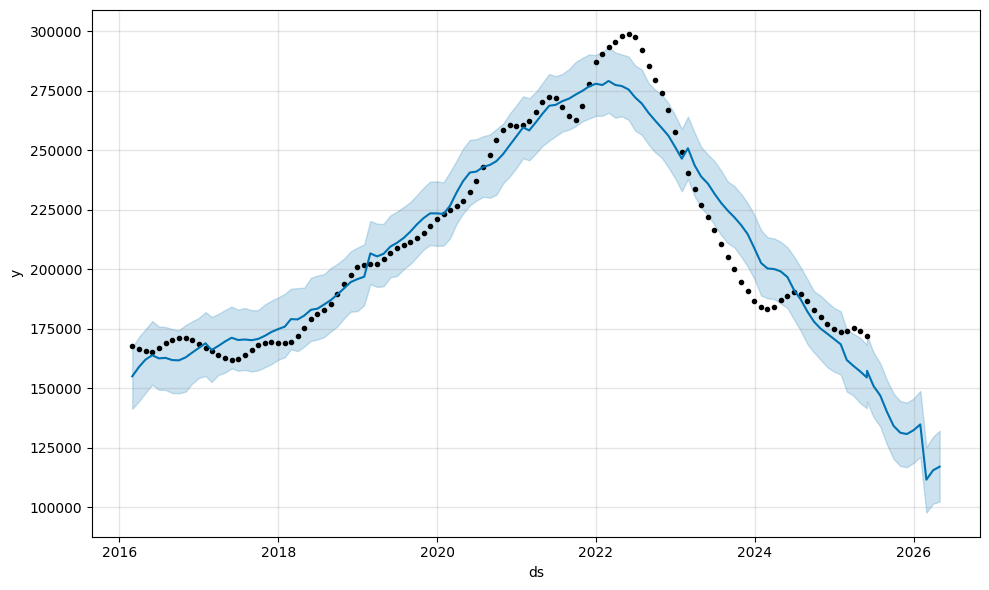

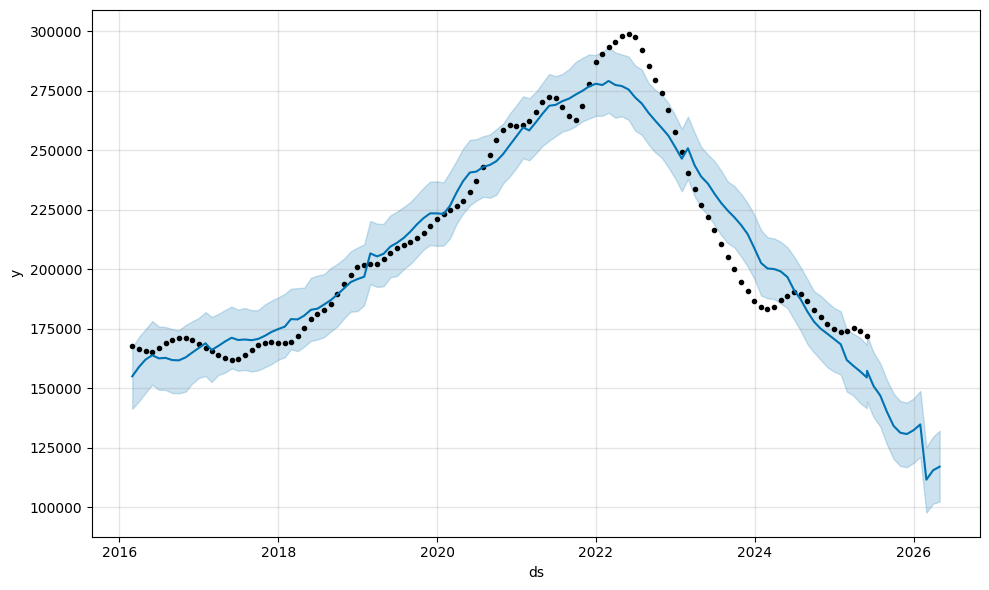

In [43]:
model.plot(forecast)

In [44]:
# import joblib

# # Generate file names based on the city name for better organization
# city_slug = city_name.replace(' ', '_').lower()
# model_path = f"/var/www/project/Housing/models/prophet_{city_slug}_model.pkl"
# forecast_path = f"/var/www/project/Housing/csvs/{city_slug}_price_forecast.csv"

# # Save the model using joblib
# joblib.dump(model, model_path)

# # Save the forecast predictions to a CSV file
# forecast[['ds', 'yhat']].to_csv(forecast_path, index=False)

# print(f"Model saved to {model_path}")
# print(f"Forecast saved to {forecast_path}")